In [7]:
#!pip install --upgrade scikit-learn

In [8]:

#Librerias de mineria de datos
import pandas as pd
import numpy as np
import seaborn as sns
import csv

#Librerias para graficar
import matplotlib.pyplot as plt
import seaborn as se
import plotly.graph_objects as go


#importo los modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split#Datos Aleatorio

#Plotear el arbol de decisión
from sklearn import tree
from sklearn.tree import plot_tree

#importo las metricas
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#Librerias de validacion cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Bosques
from sklearn.ensemble import RandomForestClassifier

import pickle

In [9]:
df= pd.read_csv("DatosEmpresaChurn.csv") #Adquiere los datos

In [10]:
df

Unnamed: 0           ANTIG   COMP  PROM    CATEG  COMINT  COMPPRES  \
0             0     9,139173266  11621  2.84  5810.36   26441     43381   
1             1     6,356319041  10037  2.68  5018.61   28898     51339   
2             2      7,21359808  12015  4.61      NaN   29946     84812   
3             3     12,34204402  13867  3.27      NaN   28897     63472   
4             4     12,79490824   9497  3.14      NaN   23414     68474   
..          ...             ...    ...   ...      ...     ...       ...   
986         986     3.356411092  10783  4.81  5391.40   21742     71897   
987         987  2000.572977452   7590  4.03  3795.17   22195     57666   
988         988     6.121557143  13549  5.74  6774.37   25704     72683   
989         989  2121.806870794  12402  3.77  6200.96   28162     74018   
990         990     8.761118029   9424  5.30  4712.07   51731     45487   

         RATE  VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    0.881519    7.0       644  0.879422  6.157047  17.729996             1  
1    1.621126   54.0      1014  0.621552  7.463508  12.458385             0  
2    1.801952    NaN      1154  0.957877  6.427984  13.994380             0  
3    2.187820    NaN      1380  1.522692  5.765465  24.684088             1  
4    1.759319    NaN       647  1.463812  7.095833  24.310326             1  
..        ...    ...       ...       ...       ...        ...           ...  
986  3.219694   68.0      1130  0.932976  7.200278   6.444309             0  
987  2.060401   69.0      1694  1.202474  7.090742  16.631576             0  
988  2.621761   73.0      1475  1.050995  7.722217  11.875821             0  
989  2.233593   86.0       820  1.337147  7.737920   9.613742             1  
990  3.684087   15.0      1297  0.522877  6.431972  16.996569             0  

[991 rows x 14 columns]

In [11]:
# Mostrar información sobre el conjunto de datos
print("Información sobre el conjunto de datos:")
df.info()

Información sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    991 non-null    int64  
 1   ANTIG         991 non-null    object 
 2   COMP          991 non-null    int64  
 3   PROM          991 non-null    float64
 4   CATEG         664 non-null    float64
 5   COMINT        991 non-null    int64  
 6   COMPPRES      991 non-null    int64  
 7   RATE          991 non-null    float64
 8   VISIT         576 non-null    float64
 9   DIASSINQ      991 non-null    int64  
 10  TASARET       991 non-null    float64
 11  NUMQ          991 non-null    float64
 12  RETRE         991 non-null    float64
 13  TARGET CLASS  991 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 108.5+ KB


In [12]:
# Aplicar la sustitución de comas por puntos en la columna 'ANTIG'
df["ANTIG"] = df["ANTIG"].str.replace(',', '.')

# Mostrar las primeras filas del DataFrame para verificar los cambios
df.head()

Unnamed: 0        ANTIG   COMP  PROM    CATEG  COMINT  COMPPRES      RATE  \
0           0  9.139173266  11621  2.84  5810.36   26441     43381  0.881519   
1           1  6.356319041  10037  2.68  5018.61   28898     51339  1.621126   
2           2   7.21359808  12015  4.61      NaN   29946     84812  1.801952   
3           3  12.34204402  13867  3.27      NaN   28897     63472  2.187820   
4           4  12.79490824   9497  3.14      NaN   23414     68474  1.759319   

   VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    7.0       644  0.879422  6.157047  17.729996             1  
1   54.0      1014  0.621552  7.463508  12.458385             0  
2    NaN      1154  0.957877  6.427984  13.994380             0  
3    NaN      1380  1.522692  5.765465  24.684088             1  
4    NaN       647  1.463812  7.095833  24.310326             1

In [13]:
# Guardar los cambios en el archivo CSV
df.to_csv("DatosEmpresaChurn_modificado.csv", index=False)

In [14]:
df['ANTIG'] = df['ANTIG'].astype(float)# Convierte la columna 'ANTIG' del DataFrame 'df' al tipo de dato float.

In [15]:
df.to_csv("DatosEmpresaChurn_modificado.csv", index=False) # Guarda el DataFrame 'df' en un archivo CSV llamado "DatosEmpresaChurn_modificado.csv",
# excluyendo el índice de fila en el archivo CSV resultante.

In [16]:
df.ANTIG # Acceder a la columna 'ANTIG'

0         9.139173
1         6.356319
2         7.213598
3        12.342044
4        12.794908
          ...     
986       3.356411
987    2000.572977
988       6.121557
989    2121.806871
990       8.761118
Name: ANTIG, Length: 991, dtype: float64

In [17]:
df.iloc[2,3] #Accede al valor ubicado en la tercera fila y cuarta columna del DataFrame df.


4.61

<Axes: >

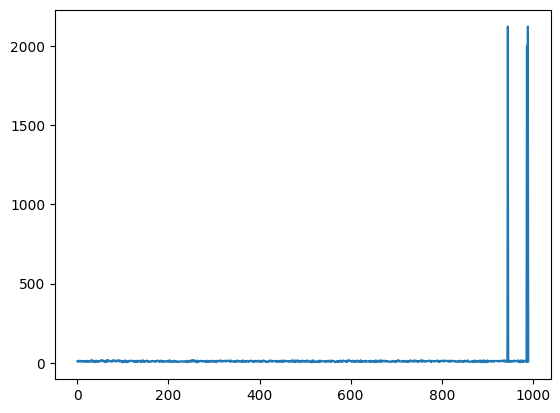

In [18]:
df.ANTIG.plot() #se utiliza para trazar un gráfico de la columna "ANTIG"

In [19]:
df.describe()#proporciona un resumen estadístico de las columnas numéricas en el DataFrame

Unnamed: 0        ANTIG          COMP        PROM        CATEG  \
count   991.00000   991.000000    991.000000  991.000000   664.000000   
mean    495.00000    15.774759  11150.442987    4.177608  5521.862605   
std     286.22136   113.963187   2573.369787    1.458875  1312.684255   
min       0.00000     1.744117   4414.000000    0.850000  2206.990000   
25%     247.50000     7.425535   9420.000000    3.080000  4665.845000   
50%     495.00000     9.433145  11202.000000    4.080000  5513.675000   
75%     742.50000    11.684588  13079.500000    5.150000  6487.972500   
max     990.00000  2121.896171  18338.000000    8.610000  9168.780000   

             COMINT      COMPPRES        RATE       VISIT     DIASSINQ  \
count    991.000000    991.000000  991.000000  576.000000   991.000000   
mean   23853.453078  57289.598385    2.361029   57.913194  1073.362260   
std     8064.382220  13483.420321    0.640561   25.571508   287.579264   
min     1576.000000  17517.000000    0.655972    2.000000   299.000000   
25%    18006.000000  48325.500000    1.902048   48.000000   867.500000   
50%    23687.000000  57316.000000    2.355008   63.000000  1068.000000   
75%    29217.500000  66559.000000    2.808603   72.000000  1284.000000   
max    57221.000000  91669.000000    4.167256  130.000000  1785.000000   

          TASARET        NUMQ       RETRE  TARGET CLASS  
count  991.000000  991.000000  991.000000    991.000000  
mean     1.158006    6.812902   18.506699      0.497477  
std      0.294427    1.021981    5.654107      0.500246  
min      0.365157    3.198464    3.348704      0.000000  
25%      0.934168    6.111838   14.375395      0.000000  
50%      1.165427    6.877483   18.273995      0.000000  
75%      1.383318    7.524972   22.615217      1.000000  
max      1.885690    9.469748   34.435583      1.000000

In [20]:
columnas= df.columns
columnas #Esto imprimirá los nombres de las columnas uno por uno.

Index(['Unnamed: 0', 'ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES',
       'RATE', 'VISIT', 'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE',
       'TARGET CLASS'],
      dtype='object')

In [21]:
dfc=df.copy()#Crea una copia independiente del DataFrame df y la asigna a la variable dfc


In [22]:
dfc.reset_index(drop=True, inplace=True)#El inplace elimina en la base de datos

In [23]:
dfc #Se imprime la copia del Dataframe


Unnamed: 0        ANTIG   COMP  PROM    CATEG  COMINT  COMPPRES  \
0             0     9.139173  11621  2.84  5810.36   26441     43381   
1             1     6.356319  10037  2.68  5018.61   28898     51339   
2             2     7.213598  12015  4.61      NaN   29946     84812   
3             3    12.342044  13867  3.27      NaN   28897     63472   
4             4    12.794908   9497  3.14      NaN   23414     68474   
..          ...          ...    ...   ...      ...     ...       ...   
986         986     3.356411  10783  4.81  5391.40   21742     71897   
987         987  2000.572977   7590  4.03  3795.17   22195     57666   
988         988     6.121557  13549  5.74  6774.37   25704     72683   
989         989  2121.806871  12402  3.77  6200.96   28162     74018   
990         990     8.761118   9424  5.30  4712.07   51731     45487   

         RATE  VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    0.881519    7.0       644  0.879422  6.157047  17.729996             1  
1    1.621126   54.0      1014  0.621552  7.463508  12.458385             0  
2    1.801952    NaN      1154  0.957877  6.427984  13.994380             0  
3    2.187820    NaN      1380  1.522692  5.765465  24.684088             1  
4    1.759319    NaN       647  1.463812  7.095833  24.310326             1  
..        ...    ...       ...       ...       ...        ...           ...  
986  3.219694   68.0      1130  0.932976  7.200278   6.444309             0  
987  2.060401   69.0      1694  1.202474  7.090742  16.631576             0  
988  2.621761   73.0      1475  1.050995  7.722217  11.875821             0  
989  2.233593   86.0       820  1.337147  7.737920   9.613742             1  
990  3.684087   15.0      1297  0.522877  6.431972  16.996569             0  

[991 rows x 14 columns]

In [24]:
dfc.columns #Esto devolverá un objeto Index que contiene los nombres de todas las columnas en el DataFrame dfc


Index(['Unnamed: 0', 'ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES',
       'RATE', 'VISIT', 'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE',
       'TARGET CLASS'],
      dtype='object')

In [25]:
len(dfc)# Obtiene el número de filas en el DataFrame 'dfc'.



991

In [26]:
dfc.shape# Obtiene la forma (número de filas, número de columnas) del DataFrame 'dfc'.


(991, 14)

In [27]:
dfc.size # Obtiene el número total de elementos en el DataFrame 'dfc'.


13874

In [28]:
dfc.head()# Devuelve las primeras filas del DataFrame 'dfc'.

Unnamed: 0      ANTIG   COMP  PROM    CATEG  COMINT  COMPPRES      RATE  \
0           0   9.139173  11621  2.84  5810.36   26441     43381  0.881519   
1           1   6.356319  10037  2.68  5018.61   28898     51339  1.621126   
2           2   7.213598  12015  4.61      NaN   29946     84812  1.801952   
3           3  12.342044  13867  3.27      NaN   28897     63472  2.187820   
4           4  12.794908   9497  3.14      NaN   23414     68474  1.759319   

   VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    7.0       644  0.879422  6.157047  17.729996             1  
1   54.0      1014  0.621552  7.463508  12.458385             0  
2    NaN      1154  0.957877  6.427984  13.994380             0  
3    NaN      1380  1.522692  5.765465  24.684088             1  
4    NaN       647  1.463812  7.095833  24.310326             1

In [29]:
dfc.head(6)# Devuelve las primeras 6 filas del DataFrame 'dfc'.

Unnamed: 0      ANTIG   COMP  PROM    CATEG  COMINT  COMPPRES      RATE  \
0           0   9.139173  11621  2.84  5810.36   26441     43381  0.881519   
1           1   6.356319  10037  2.68  5018.61   28898     51339  1.621126   
2           2   7.213598  12015  4.61      NaN   29946     84812  1.801952   
3           3  12.342044  13867  3.27      NaN   28897     63472  2.187820   
4           4  12.794908   9497  3.14      NaN   23414     68474  1.759319   
5           5   8.339278  15233  5.52      NaN   35740     61520  2.527324   

   VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    7.0       644  0.879422  6.157047  17.729996             1  
1   54.0      1014  0.621552  7.463508  12.458385             0  
2    NaN      1154  0.957877  6.427984  13.994380             0  
3    NaN      1380  1.522692  5.765465  24.684088             1  
4    NaN       647  1.463812  7.095833  24.310326             1  
5    NaN      1281  0.510350  7.640218  16.178199             0

In [30]:
dfc.iloc[5,2]# Accede al valor en la fila 5 y columna 2 del DataFrame 'dfc' usando la indexación basada en la posición.

15233

In [31]:
dfc.iloc[:5] # Accede a las primeras 5 filas del DataFrame 'dfc' usando la indexación basada en la posición.

Unnamed: 0      ANTIG   COMP  PROM    CATEG  COMINT  COMPPRES      RATE  \
0           0   9.139173  11621  2.84  5810.36   26441     43381  0.881519   
1           1   6.356319  10037  2.68  5018.61   28898     51339  1.621126   
2           2   7.213598  12015  4.61      NaN   29946     84812  1.801952   
3           3  12.342044  13867  3.27      NaN   28897     63472  2.187820   
4           4  12.794908   9497  3.14      NaN   23414     68474  1.759319   

   VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    7.0       644  0.879422  6.157047  17.729996             1  
1   54.0      1014  0.621552  7.463508  12.458385             0  
2    NaN      1154  0.957877  6.427984  13.994380             0  
3    NaN      1380  1.522692  5.765465  24.684088             1  
4    NaN       647  1.463812  7.095833  24.310326             1

In [32]:
dfc.info()# Muestra información sobre el DataFrame 'dfc', incluyendo el tipo de datos de cada columna y el uso de memoria.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    991 non-null    int64  
 1   ANTIG         991 non-null    float64
 2   COMP          991 non-null    int64  
 3   PROM          991 non-null    float64
 4   CATEG         664 non-null    float64
 5   COMINT        991 non-null    int64  
 6   COMPPRES      991 non-null    int64  
 7   RATE          991 non-null    float64
 8   VISIT         576 non-null    float64
 9   DIASSINQ      991 non-null    int64  
 10  TASARET       991 non-null    float64
 11  NUMQ          991 non-null    float64
 12  RETRE         991 non-null    float64
 13  TARGET CLASS  991 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 108.5 KB


In [33]:
dfc.describe()# Genera estadísticas descriptivas para el DataFrame 'dfc', como la media, la desviación estándar, los percentiles, etc.

Unnamed: 0        ANTIG          COMP        PROM        CATEG  \
count   991.00000   991.000000    991.000000  991.000000   664.000000   
mean    495.00000    15.774759  11150.442987    4.177608  5521.862605   
std     286.22136   113.963187   2573.369787    1.458875  1312.684255   
min       0.00000     1.744117   4414.000000    0.850000  2206.990000   
25%     247.50000     7.425535   9420.000000    3.080000  4665.845000   
50%     495.00000     9.433145  11202.000000    4.080000  5513.675000   
75%     742.50000    11.684588  13079.500000    5.150000  6487.972500   
max     990.00000  2121.896171  18338.000000    8.610000  9168.780000   

             COMINT      COMPPRES        RATE       VISIT     DIASSINQ  \
count    991.000000    991.000000  991.000000  576.000000   991.000000   
mean   23853.453078  57289.598385    2.361029   57.913194  1073.362260   
std     8064.382220  13483.420321    0.640561   25.571508   287.579264   
min     1576.000000  17517.000000    0.655972    2.000000   299.000000   
25%    18006.000000  48325.500000    1.902048   48.000000   867.500000   
50%    23687.000000  57316.000000    2.355008   63.000000  1068.000000   
75%    29217.500000  66559.000000    2.808603   72.000000  1284.000000   
max    57221.000000  91669.000000    4.167256  130.000000  1785.000000   

          TASARET        NUMQ       RETRE  TARGET CLASS  
count  991.000000  991.000000  991.000000    991.000000  
mean     1.158006    6.812902   18.506699      0.497477  
std      0.294427    1.021981    5.654107      0.500246  
min      0.365157    3.198464    3.348704      0.000000  
25%      0.934168    6.111838   14.375395      0.000000  
50%      1.165427    6.877483   18.273995      0.000000  
75%      1.383318    7.524972   22.615217      1.000000  
max      1.885690    9.469748   34.435583      1.000000

In [34]:
dfc.isnull().sum() #Halla los campos donde no hay datos

Unnamed: 0        0
ANTIG             0
COMP              0
PROM              0
CATEG           327
COMINT            0
COMPPRES          0
RATE              0
VISIT           415
DIASSINQ          0
TASARET           0
NUMQ              0
RETRE             0
TARGET CLASS      0
dtype: int64

In [35]:
porcentaje_nulos = (dfc['CATEG'].isnull().sum() / len(dfc)) * 100 # Calcula el porcentaje de valores nulos en la columna 'CATEG' del DataFrame 'dfc'.

print("Porcentaje de valores nulos para CATEG:")
print(porcentaje_nulos)

Porcentaje de valores nulos para CATEG:
32.996972754793134


In [36]:
porcentaje_nulos = (dfc['VISIT'].isnull().sum() / len(dfc)) * 100 # Calcula el porcentaje de valores nulos en la columna 'VISIT' del DataFrame 'dfc'.

print("Porcentaje de valores nulos para VISIT:")
print(porcentaje_nulos)

Porcentaje de valores nulos para VISIT:
41.87689202825429


In [37]:
dfc.VISIT.fillna(0,inplace=True)# Rellena los valores nulos en la columna 'VISIT' del DataFrame 'dfc' con ceros.
# Modifica el DataFrame 'dfc' inplace., se rellena los nulos con el valor de Cero(0) , pues se asume que este feature hace referencias al numero de visitas que ha tenido la casa

In [38]:
dfc #Se imprime el DataFrame para mostrar los cambios ejercido al feature VISIT


Unnamed: 0        ANTIG   COMP  PROM    CATEG  COMINT  COMPPRES  \
0             0     9.139173  11621  2.84  5810.36   26441     43381   
1             1     6.356319  10037  2.68  5018.61   28898     51339   
2             2     7.213598  12015  4.61      NaN   29946     84812   
3             3    12.342044  13867  3.27      NaN   28897     63472   
4             4    12.794908   9497  3.14      NaN   23414     68474   
..          ...          ...    ...   ...      ...     ...       ...   
986         986     3.356411  10783  4.81  5391.40   21742     71897   
987         987  2000.572977   7590  4.03  3795.17   22195     57666   
988         988     6.121557  13549  5.74  6774.37   25704     72683   
989         989  2121.806871  12402  3.77  6200.96   28162     74018   
990         990     8.761118   9424  5.30  4712.07   51731     45487   

         RATE  VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    0.881519    7.0       644  0.879422  6.157047  17.729996             1  
1    1.621126   54.0      1014  0.621552  7.463508  12.458385             0  
2    1.801952    0.0      1154  0.957877  6.427984  13.994380             0  
3    2.187820    0.0      1380  1.522692  5.765465  24.684088             1  
4    1.759319    0.0       647  1.463812  7.095833  24.310326             1  
..        ...    ...       ...       ...       ...        ...           ...  
986  3.219694   68.0      1130  0.932976  7.200278   6.444309             0  
987  2.060401   69.0      1694  1.202474  7.090742  16.631576             0  
988  2.621761   73.0      1475  1.050995  7.722217  11.875821             0  
989  2.233593   86.0       820  1.337147  7.737920   9.613742             1  
990  3.684087   15.0      1297  0.522877  6.431972  16.996569             0  

[991 rows x 14 columns]

In [39]:
media_categ = dfc['CATEG'].mean() ## Calcula la media de los valores en la columna 'CATEG' del DataFrame 'dfc' y almacena el resultado en la variable 'media_categ'.
media_categ


5521.862605421687

In [40]:
dfc['CATEG'].fillna(media_categ, inplace=True)# Rellena los valores nulos en la columna 'CATEG' del DataFrame 'dfc' con la media de los valores no nulos en esa columna.
# Modifica el DataFrame 'dfc' inplace.

In [41]:
dfc #Se imprime el DataFrame para visualizar los cambios en el feature CATEG

Unnamed: 0        ANTIG   COMP  PROM        CATEG  COMINT  COMPPRES  \
0             0     9.139173  11621  2.84  5810.360000   26441     43381   
1             1     6.356319  10037  2.68  5018.610000   28898     51339   
2             2     7.213598  12015  4.61  5521.862605   29946     84812   
3             3    12.342044  13867  3.27  5521.862605   28897     63472   
4             4    12.794908   9497  3.14  5521.862605   23414     68474   
..          ...          ...    ...   ...          ...     ...       ...   
986         986     3.356411  10783  4.81  5391.400000   21742     71897   
987         987  2000.572977   7590  4.03  3795.170000   22195     57666   
988         988     6.121557  13549  5.74  6774.370000   25704     72683   
989         989  2121.806871  12402  3.77  6200.960000   28162     74018   
990         990     8.761118   9424  5.30  4712.070000   51731     45487   

         RATE  VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    0.881519    7.0       644  0.879422  6.157047  17.729996             1  
1    1.621126   54.0      1014  0.621552  7.463508  12.458385             0  
2    1.801952    0.0      1154  0.957877  6.427984  13.994380             0  
3    2.187820    0.0      1380  1.522692  5.765465  24.684088             1  
4    1.759319    0.0       647  1.463812  7.095833  24.310326             1  
..        ...    ...       ...       ...       ...        ...           ...  
986  3.219694   68.0      1130  0.932976  7.200278   6.444309             0  
987  2.060401   69.0      1694  1.202474  7.090742  16.631576             0  
988  2.621761   73.0      1475  1.050995  7.722217  11.875821             0  
989  2.233593   86.0       820  1.337147  7.737920   9.613742             1  
990  3.684087   15.0      1297  0.522877  6.431972  16.996569             0  

[991 rows x 14 columns]

In [42]:
# Eliminar valores ilógicos en el DataFrame original df
dfc = dfc[dfc['ANTIG'] < 150]



In [43]:
dfc#Se imprime el DataFrame para visualizar los cambios en el Feature ANTIG

Unnamed: 0      ANTIG   COMP  PROM        CATEG  COMINT  COMPPRES  \
0             0   9.139173  11621  2.84  5810.360000   26441     43381   
1             1   6.356319  10037  2.68  5018.610000   28898     51339   
2             2   7.213598  12015  4.61  5521.862605   29946     84812   
3             3  12.342044  13867  3.27  5521.862605   28897     63472   
4             4  12.794908   9497  3.14  5521.862605   23414     68474   
..          ...        ...    ...   ...          ...     ...       ...   
984         984   9.615991  11227  1.16  5613.380000   30335     76962   
985         985  11.502045   7264  4.29  3631.850000   26280     35545   
986         986   3.356411  10783  4.81  5391.400000   21742     71897   
988         988   6.121557  13549  5.74  6774.370000   25704     72683   
990         990   8.761118   9424  5.30  4712.070000   51731     45487   

         RATE  VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0    0.881519    7.0       644  0.879422  6.157047  17.729996             1  
1    1.621126   54.0      1014  0.621552  7.463508  12.458385             0  
2    1.801952    0.0      1154  0.957877  6.427984  13.994380             0  
3    2.187820    0.0      1380  1.522692  5.765465  24.684088             1  
4    1.759319    0.0       647  1.463812  7.095833  24.310326             1  
..        ...    ...       ...       ...       ...        ...           ...  
984  2.213921   56.0      1344  0.972178  4.583442  18.655023             1  
985  1.237705   65.0       472  1.263450  6.163529  22.544009             1  
986  3.219694   68.0      1130  0.932976  7.200278   6.444309             0  
988  2.621761   73.0      1475  1.050995  7.722217  11.875821             0  
990  3.684087   15.0      1297  0.522877  6.431972  16.996569             0  

[988 rows x 14 columns]

In [44]:
dfc.isnull()# Verifica si cada elemento del DataFrame 'dfc' es nulo.

Unnamed: 0  ANTIG   COMP   PROM  CATEG  COMINT  COMPPRES   RATE  VISIT  \
0         False  False  False  False  False   False     False  False  False   
1         False  False  False  False  False   False     False  False  False   
2         False  False  False  False  False   False     False  False  False   
3         False  False  False  False  False   False     False  False  False   
4         False  False  False  False  False   False     False  False  False   
..          ...    ...    ...    ...    ...     ...       ...    ...    ...   
984       False  False  False  False  False   False     False  False  False   
985       False  False  False  False  False   False     False  False  False   
986       False  False  False  False  False   False     False  False  False   
988       False  False  False  False  False   False     False  False  False   
990       False  False  False  False  False   False     False  False  False   

     DIASSINQ  TASARET   NUMQ  RETRE  TARGET CLASS  
0       False    False  False  False         False  
1       False    False  False  False         False  
2       False    False  False  False         False  
3       False    False  False  False         False  
4       False    False  False  False         False  
..        ...      ...    ...    ...           ...  
984     False    False  False  False         False  
985     False    False  False  False         False  
986     False    False  False  False         False  
988     False    False  False  False         False  
990     False    False  False  False         False  

[988 rows x 14 columns]

In [45]:
dfc.isnull().sum()# Calcula el recuento de valores nulos para cada columna en el DataFrame 'dfc'.

Unnamed: 0      0
ANTIG           0
COMP            0
PROM            0
CATEG           0
COMINT          0
COMPPRES        0
RATE            0
VISIT           0
DIASSINQ        0
TASARET         0
NUMQ            0
RETRE           0
TARGET CLASS    0
dtype: int64

In [46]:
# Eliminar la columna "Unnamed: 0"
dfc.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-46-062b3ce68bcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.drop(columns=['Unnamed: 0'], inplace=True)


In [47]:
dfc.isnull().sum() #Verifica la eliminacion del Feature "Unnamed: 0"

ANTIG           0
COMP            0
PROM            0
CATEG           0
COMINT          0
COMPPRES        0
RATE            0
VISIT           0
DIASSINQ        0
TASARET         0
NUMQ            0
RETRE           0
TARGET CLASS    0
dtype: int64

In [48]:
dfc.describe(include=['float','int'])# Genera un resumen estadístico de las columnas numéricas (float e int) en el DataFrame 'dfc'.

ANTIG          COMP        PROM        CATEG        COMINT  \
count  988.000000    988.000000  988.000000   988.000000    988.000000   
mean     9.502541  11153.163968    4.178998  5523.061004  23855.618421   
std      2.903485   2574.446813    1.460793  1074.235016   8073.852405   
min      1.744117   4414.000000    0.850000  2206.990000   1576.000000   
25%      7.423577   9421.000000    3.080000  5101.000000  18002.250000   
50%      9.404751  11205.000000    4.105000  5521.862605  23689.000000   
75%     11.661974  13081.750000    5.152500  5992.240000  29254.500000   
max     17.217792  18338.000000    8.610000  9168.780000  57221.000000   

           COMPPRES        RATE       VISIT     DIASSINQ     TASARET  \
count    988.000000  988.000000  988.000000   988.000000  988.000000   
mean   57259.076923    2.362013   33.526316  1073.200405    1.157301   
std    13486.958798    0.641215   34.561053   287.148589    0.294429   
min    17517.000000    0.655972    0.000000   299.000000    0.365157   
25%    48276.000000    1.902659    0.000000   869.500000    0.933862   
50%    57272.500000    2.355742   20.500000  1068.500000    1.165003   
75%    66552.000000    2.809275   64.000000  1283.500000    1.383173   
max    91669.000000    4.167256  130.000000  1785.000000    1.885690   

             NUMQ       RETRE  TARGET CLASS  
count  988.000000  988.000000    988.000000  
mean     6.811790   18.516297      0.496964  
std      1.023065    5.655143      0.500244  
min      3.198464    3.348704      0.000000  
25%      6.109145   14.378729      0.000000  
50%      6.876840   18.284606      0.000000  
75%      7.524160   22.635781      1.000000  
max      9.469748   34.435583      1.000000

In [49]:
dfc.info()# Proporciona un resumen conciso del DataFrame 'dfc', incluyendo el número de entradas no nulas, el tipo de datos de cada columna y la cantidad de memoria utilizada.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 990
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ANTIG         988 non-null    float64
 1   COMP          988 non-null    int64  
 2   PROM          988 non-null    float64
 3   CATEG         988 non-null    float64
 4   COMINT        988 non-null    int64  
 5   COMPPRES      988 non-null    int64  
 6   RATE          988 non-null    float64
 7   VISIT         988 non-null    float64
 8   DIASSINQ      988 non-null    int64  
 9   TASARET       988 non-null    float64
 10  NUMQ          988 non-null    float64
 11  RETRE         988 non-null    float64
 12  TARGET CLASS  988 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 108.1 KB


In [50]:
dfc #Se imprime el Data Frame resultante

ANTIG   COMP  PROM        CATEG  COMINT  COMPPRES      RATE  VISIT  \
0     9.139173  11621  2.84  5810.360000   26441     43381  0.881519    7.0   
1     6.356319  10037  2.68  5018.610000   28898     51339  1.621126   54.0   
2     7.213598  12015  4.61  5521.862605   29946     84812  1.801952    0.0   
3    12.342044  13867  3.27  5521.862605   28897     63472  2.187820    0.0   
4    12.794908   9497  3.14  5521.862605   23414     68474  1.759319    0.0   
..         ...    ...   ...          ...     ...       ...       ...    ...   
984   9.615991  11227  1.16  5613.380000   30335     76962  2.213921   56.0   
985  11.502045   7264  4.29  3631.850000   26280     35545  1.237705   65.0   
986   3.356411  10783  4.81  5391.400000   21742     71897  3.219694   68.0   
988   6.121557  13549  5.74  6774.370000   25704     72683  2.621761   73.0   
990   8.761118   9424  5.30  4712.070000   51731     45487  3.684087   15.0   

     DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0         644  0.879422  6.157047  17.729996             1  
1        1014  0.621552  7.463508  12.458385             0  
2        1154  0.957877  6.427984  13.994380             0  
3        1380  1.522692  5.765465  24.684088             1  
4         647  1.463812  7.095833  24.310326             1  
..        ...       ...       ...        ...           ...  
984      1344  0.972178  4.583442  18.655023             1  
985       472  1.263450  6.163529  22.544009             1  
986      1130  0.932976  7.200278   6.444309             0  
988      1475  1.050995  7.722217  11.875821             0  
990      1297  0.522877  6.431972  16.996569             0  

[988 rows x 13 columns]

In [51]:
# Reiniciar el índice para que sea progresivo sin saltos
dfc.reset_index(drop=True, inplace=True)

In [52]:
dfc #Se muestra el arreglo del indice en el DataFrame

ANTIG   COMP  PROM        CATEG  COMINT  COMPPRES      RATE  VISIT  \
0     9.139173  11621  2.84  5810.360000   26441     43381  0.881519    7.0   
1     6.356319  10037  2.68  5018.610000   28898     51339  1.621126   54.0   
2     7.213598  12015  4.61  5521.862605   29946     84812  1.801952    0.0   
3    12.342044  13867  3.27  5521.862605   28897     63472  2.187820    0.0   
4    12.794908   9497  3.14  5521.862605   23414     68474  1.759319    0.0   
..         ...    ...   ...          ...     ...       ...       ...    ...   
983   9.615991  11227  1.16  5613.380000   30335     76962  2.213921   56.0   
984  11.502045   7264  4.29  3631.850000   26280     35545  1.237705   65.0   
985   3.356411  10783  4.81  5391.400000   21742     71897  3.219694   68.0   
986   6.121557  13549  5.74  6774.370000   25704     72683  2.621761   73.0   
987   8.761118   9424  5.30  4712.070000   51731     45487  3.684087   15.0   

     DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0         644  0.879422  6.157047  17.729996             1  
1        1014  0.621552  7.463508  12.458385             0  
2        1154  0.957877  6.427984  13.994380             0  
3        1380  1.522692  5.765465  24.684088             1  
4         647  1.463812  7.095833  24.310326             1  
..        ...       ...       ...        ...           ...  
983      1344  0.972178  4.583442  18.655023             1  
984       472  1.263450  6.163529  22.544009             1  
985      1130  0.932976  7.200278   6.444309             0  
986      1475  1.050995  7.722217  11.875821             0  
987      1297  0.522877  6.431972  16.996569             0  

[988 rows x 13 columns]

In [53]:
dfc['TARGET CLASS'].value_counts() #numero de datos (Sirve para ver si los datos estan balanceados)

0    497
1    491
Name: TARGET CLASS, dtype: int64

MODELOS DE INTELIGENCIA ARTIFICIAL


NAIVE BAYES - VISTA MINABLE


In [54]:
#Datos de prueba y los datos entrenamiento con una division del 80%
X=dfc.drop("TARGET CLASS", axis=1)# selecciono las caracteristicas, el drop=borra columna
y=dfc["TARGET CLASS"]#selecciono la columna target

In [55]:
X.columns# Obtiene los nombres de las columnas del DataFrame o matriz X.

Index(['ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES', 'RATE', 'VISIT',
       'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE'],
      dtype='object')

In [56]:
y #Imprime el indice junto a su respectivo resultado "Columna Label"


0      1
1      0
2      0
3      1
4      1
      ..
983    1
984    1
985    0
986    0
987    0
Name: TARGET CLASS, Length: 988, dtype: int64

In [57]:
X_train,X_text,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=999999)# Divide los datos en conjuntos de entrenamiento y prueba.
# X contiene las características y y contiene las etiquetas.
# Se utiliza un tamaño de entrenamiento del 80% y un tamaño de prueba del 20%.
# Se establece una semilla aleatoria para garantizar la reproducibilidad.

In [58]:
len(y)# Obtiene la longitud de la serie 'y', que corresponde al número de etiquetas en los datos.

988

In [59]:
len(dfc),len(X_train),len(y_train)# Obtiene la longitud de dfc, X_train y y_train para conocer el número de filas en cada conjunto de datos.

(988, 790, 790)

In [60]:
len(X_text)# Obtiene la longitud de X_text para conocer el número de observaciones en el conjunto de prueba.

198

In [61]:
modeloNB=GaussianNB() #DECLARAR INSTANCIA O CREACION DE MODELO

In [62]:
modeloNB.fit(X_train, y_train)# Entrena un modelo de clasificación Naive Bayes utilizando los datos de entrenamiento X_train y las etiquetas y_train.

GaussianNB()

In [63]:
import joblib as jb # Guarda el modelo entrenado de Naive Bayes en un archivo utilizando la biblioteca joblib.
jb.dump(modeloNB,"ModeloNB,bin",compress=True)

['ModeloNB,bin']

In [64]:
datos_prueba=[[14,8761,5,6000,29000,40000,2,0,1000,2,4,20],[28,16761,1,1000,19000,25000,0,2,7,789,5,20]]

In [65]:
prediccion=modeloNB.predict(datos_prueba) # Utiliza el modelo entrenado de Naive Bayes para hacer predicciones sobre el conjunto de datos de prueba.
prediccion

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1, 0])

In [66]:
#Validar el modelo con  Datos de Prueba
y_prect=modeloNB.predict(X_text)

In [67]:
y_prect #Muestra las predicciones del modelo

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [68]:
y_test ;  y_prect

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [69]:
y_test.values# Obtiene los valores de las etiquetas reales del conjunto de datos de prueba como un arreglo NumPy.

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [70]:
y_predictdfc=pd.DataFrame(y_prect,columns=["prediccion"]) #Convertir arreglo y_prect en un dataframe, para ver
y_predictdfc

prediccion
0             1
1             0
2             1
3             1
4             1
..          ...
193           0
194           0
195           1
196           1
197           0

[198 rows x 1 columns]

In [71]:
y_test_ordenado=y_test.reset_index(drop=True) #Para resetar el indice de y_test y poner un indice ordinal
y_test_ordenado #Recordar que  y_test es lo "real", lo que ya sabemos lo historico

0      1
1      0
2      1
3      1
4      1
      ..
193    0
194    1
195    1
196    0
197    0
Name: TARGET CLASS, Length: 198, dtype: int64

In [72]:
comparativo=pd.concat([y_test_ordenado, y_predictdfc],axis=1) #Une el dataframe y_test_ordenado con el
print(comparativo.head(20))

    TARGET CLASS  prediccion
0              1           1
1              0           0
2              1           1
3              1           1
4              1           1
5              0           0
6              0           0
7              0           0
8              0           0
9              1           1
10             1           1
11             0           1
12             1           1
13             1           0
14             0           0
15             0           0
16             1           1
17             1           1
18             1           1
19             1           1


In [73]:
modeloNB.score(X_text,y_test)

0.9090909090909091

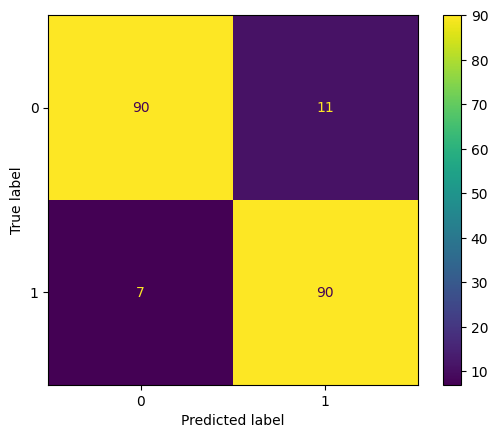

In [74]:
matrix=confusion_matrix(y_test,y_prect) #Se crea una tabla con los datos de la matriz
#Grafica la amtriz
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloNB.classes_)
mostrarMatrix.plot()

In [75]:
print(classification_report(y_test,y_prect))# Imprime un informe de clasificación que muestra métricas de evaluación detalladas para comparar las etiquetas reales y las predicciones del modelo.

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       101
           1       0.89      0.93      0.91        97

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



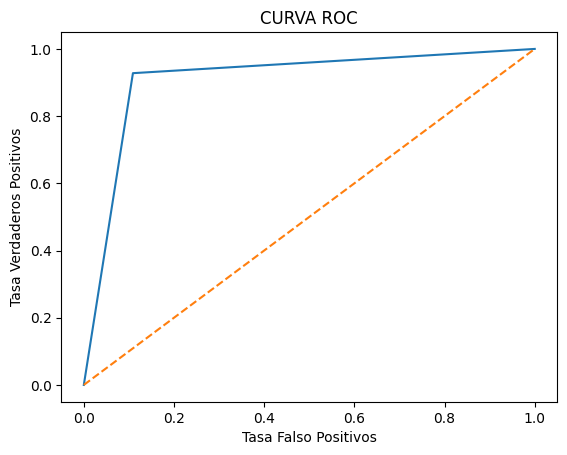

In [76]:
fpr,tpr,umbral=roc_curve(y_test,y_prect)
#graficar la curva ROC
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falso Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.title("CURVA ROC")
plt.show()

In [77]:
X.columns# Obtener los nombres de las columnas del conjunto de datos de características X

Index(['ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES', 'RATE', 'VISIT',
       'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE'],
      dtype='object')

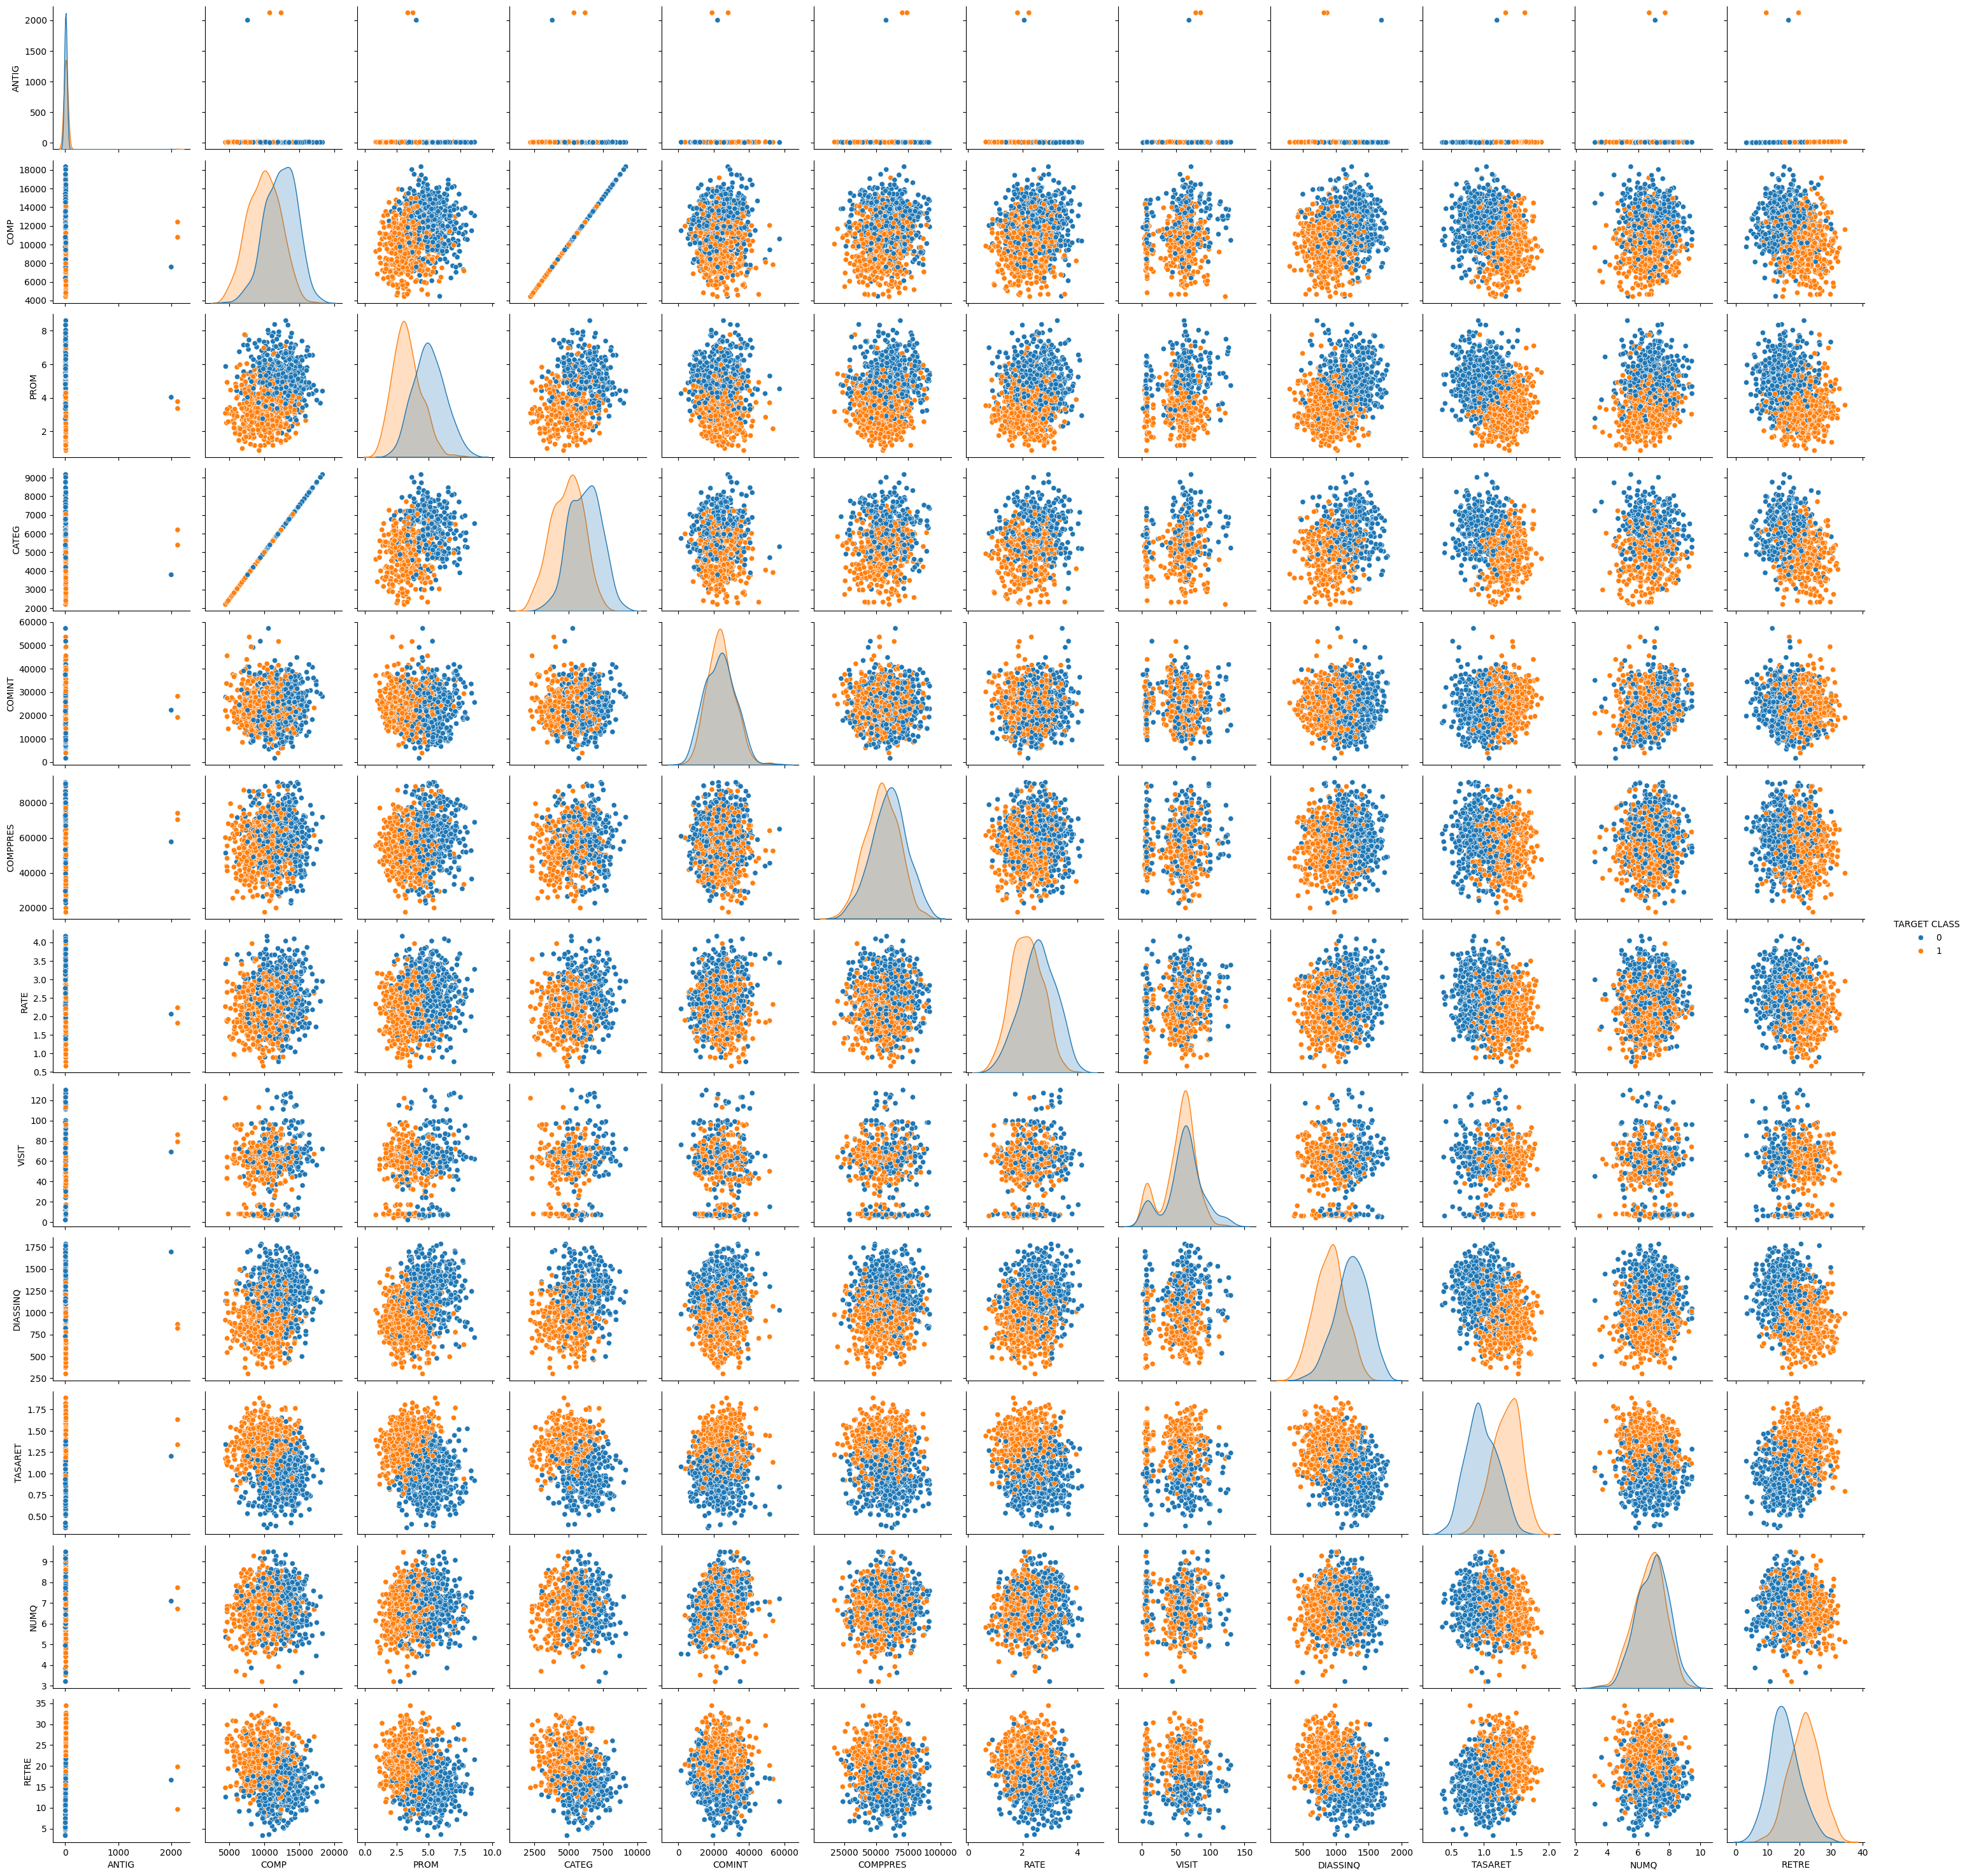

In [78]:
sns.pairplot(df,hue='TARGET CLASS',vars=['ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES', 'RATE', 'VISIT',
       'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE'])
plt.show() #indice correlacion

In [79]:
corr_matrix=dfc.corr()
corr_matrix['TARGET CLASS'].sort_values(ascending=False) #Matriz correlacion

TARGET CLASS    1.000000
TASARET         0.644744
RETRE           0.555995
ANTIG           0.554488
VISIT           0.040001
COMINT          0.027136
NUMQ           -0.112015
COMPPRES       -0.211026
RATE           -0.324905
CATEG          -0.411856
COMP           -0.470027
DIASSINQ       -0.572113
PROM           -0.596639
Name: TARGET CLASS, dtype: float64

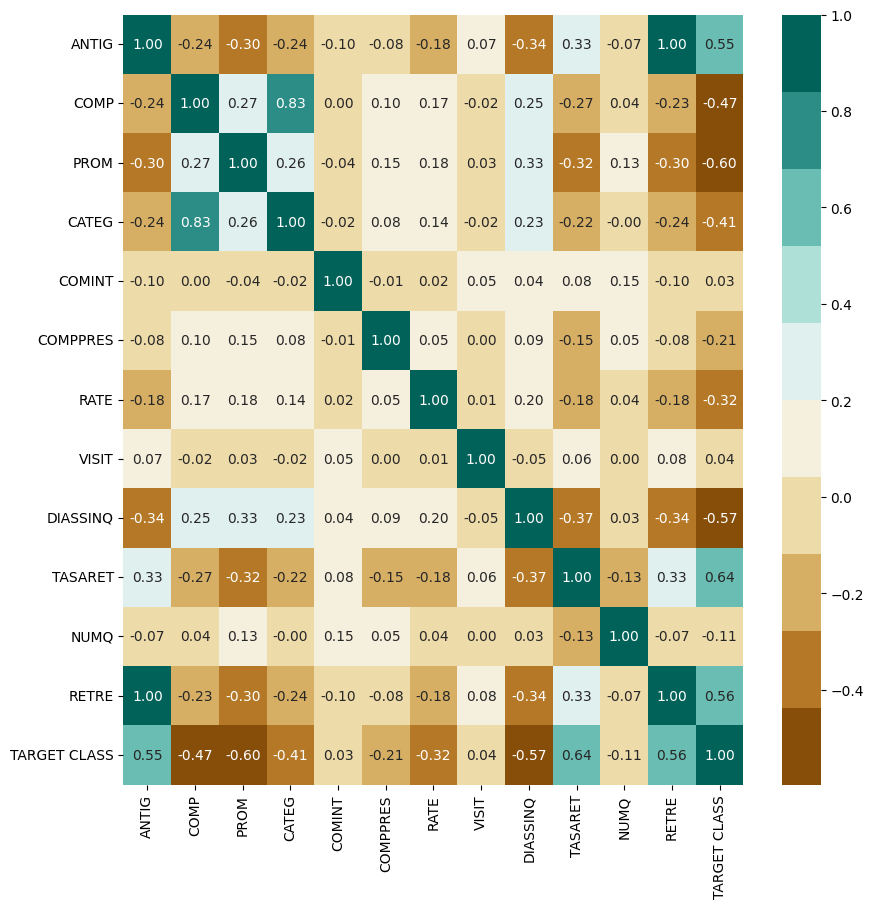

In [80]:
#Plot figsize
fig, ax=plt.subplots(figsize=(10,10))
#Generate Color Map
#colormap=sns.diverging_palette(220,10,as_cmap=True)
colormap=sns.color_palette("BrBG",10)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show() #CUANDO DOS VARIABLES TENGAN CORRELACION MAYOR A 0.8 UNA DE ELLAS ES CANDIDATA A SER ELIMANDA DEL MODELO POR MULTICOLINEALIDAD , HACER DROP, SE QUITA LA QUE TENGA MENOR VARIANZA

In [81]:
dfc.describe()# Proporciona un resumen estadístico de las columnas numéricas en el DataFrame 'dfc'.

ANTIG          COMP        PROM        CATEG        COMINT  \
count  988.000000    988.000000  988.000000   988.000000    988.000000   
mean     9.502541  11153.163968    4.178998  5523.061004  23855.618421   
std      2.903485   2574.446813    1.460793  1074.235016   8073.852405   
min      1.744117   4414.000000    0.850000  2206.990000   1576.000000   
25%      7.423577   9421.000000    3.080000  5101.000000  18002.250000   
50%      9.404751  11205.000000    4.105000  5521.862605  23689.000000   
75%     11.661974  13081.750000    5.152500  5992.240000  29254.500000   
max     17.217792  18338.000000    8.610000  9168.780000  57221.000000   

           COMPPRES        RATE       VISIT     DIASSINQ     TASARET  \
count    988.000000  988.000000  988.000000   988.000000  988.000000   
mean   57259.076923    2.362013   33.526316  1073.200405    1.157301   
std    13486.958798    0.641215   34.561053   287.148589    0.294429   
min    17517.000000    0.655972    0.000000   299.000000    0.365157   
25%    48276.000000    1.902659    0.000000   869.500000    0.933862   
50%    57272.500000    2.355742   20.500000  1068.500000    1.165003   
75%    66552.000000    2.809275   64.000000  1283.500000    1.383173   
max    91669.000000    4.167256  130.000000  1785.000000    1.885690   

             NUMQ       RETRE  TARGET CLASS  
count  988.000000  988.000000    988.000000  
mean     6.811790   18.516297      0.496964  
std      1.023065    5.655143      0.500244  
min      3.198464    3.348704      0.000000  
25%      6.109145   14.378729      0.000000  
50%      6.876840   18.284606      0.000000  
75%      7.524160   22.635781      1.000000  
max      9.469748   34.435583      1.000000

In [82]:
#Calcular Varianza
dfc.var()

ANTIG           8.430226e+00
COMP            6.627776e+06
PROM            2.133916e+00
CATEG           1.153981e+06
COMINT          6.518709e+07
COMPPRES        1.818981e+08
RATE            4.111561e-01
VISIT           1.194466e+03
DIASSINQ        8.245431e+04
TASARET         8.668864e-02
NUMQ            1.046662e+00
RETRE           3.198064e+01
TARGET CLASS    2.502441e-01
dtype: float64

<Axes: >

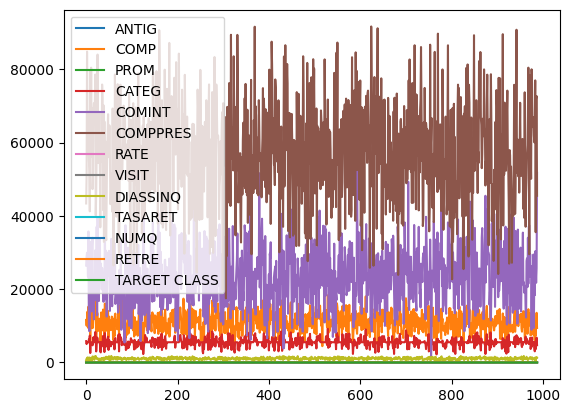

In [83]:
dfc.plot()# Genera gráficos para cada columna numérica en el DataFrame 'dfc'.

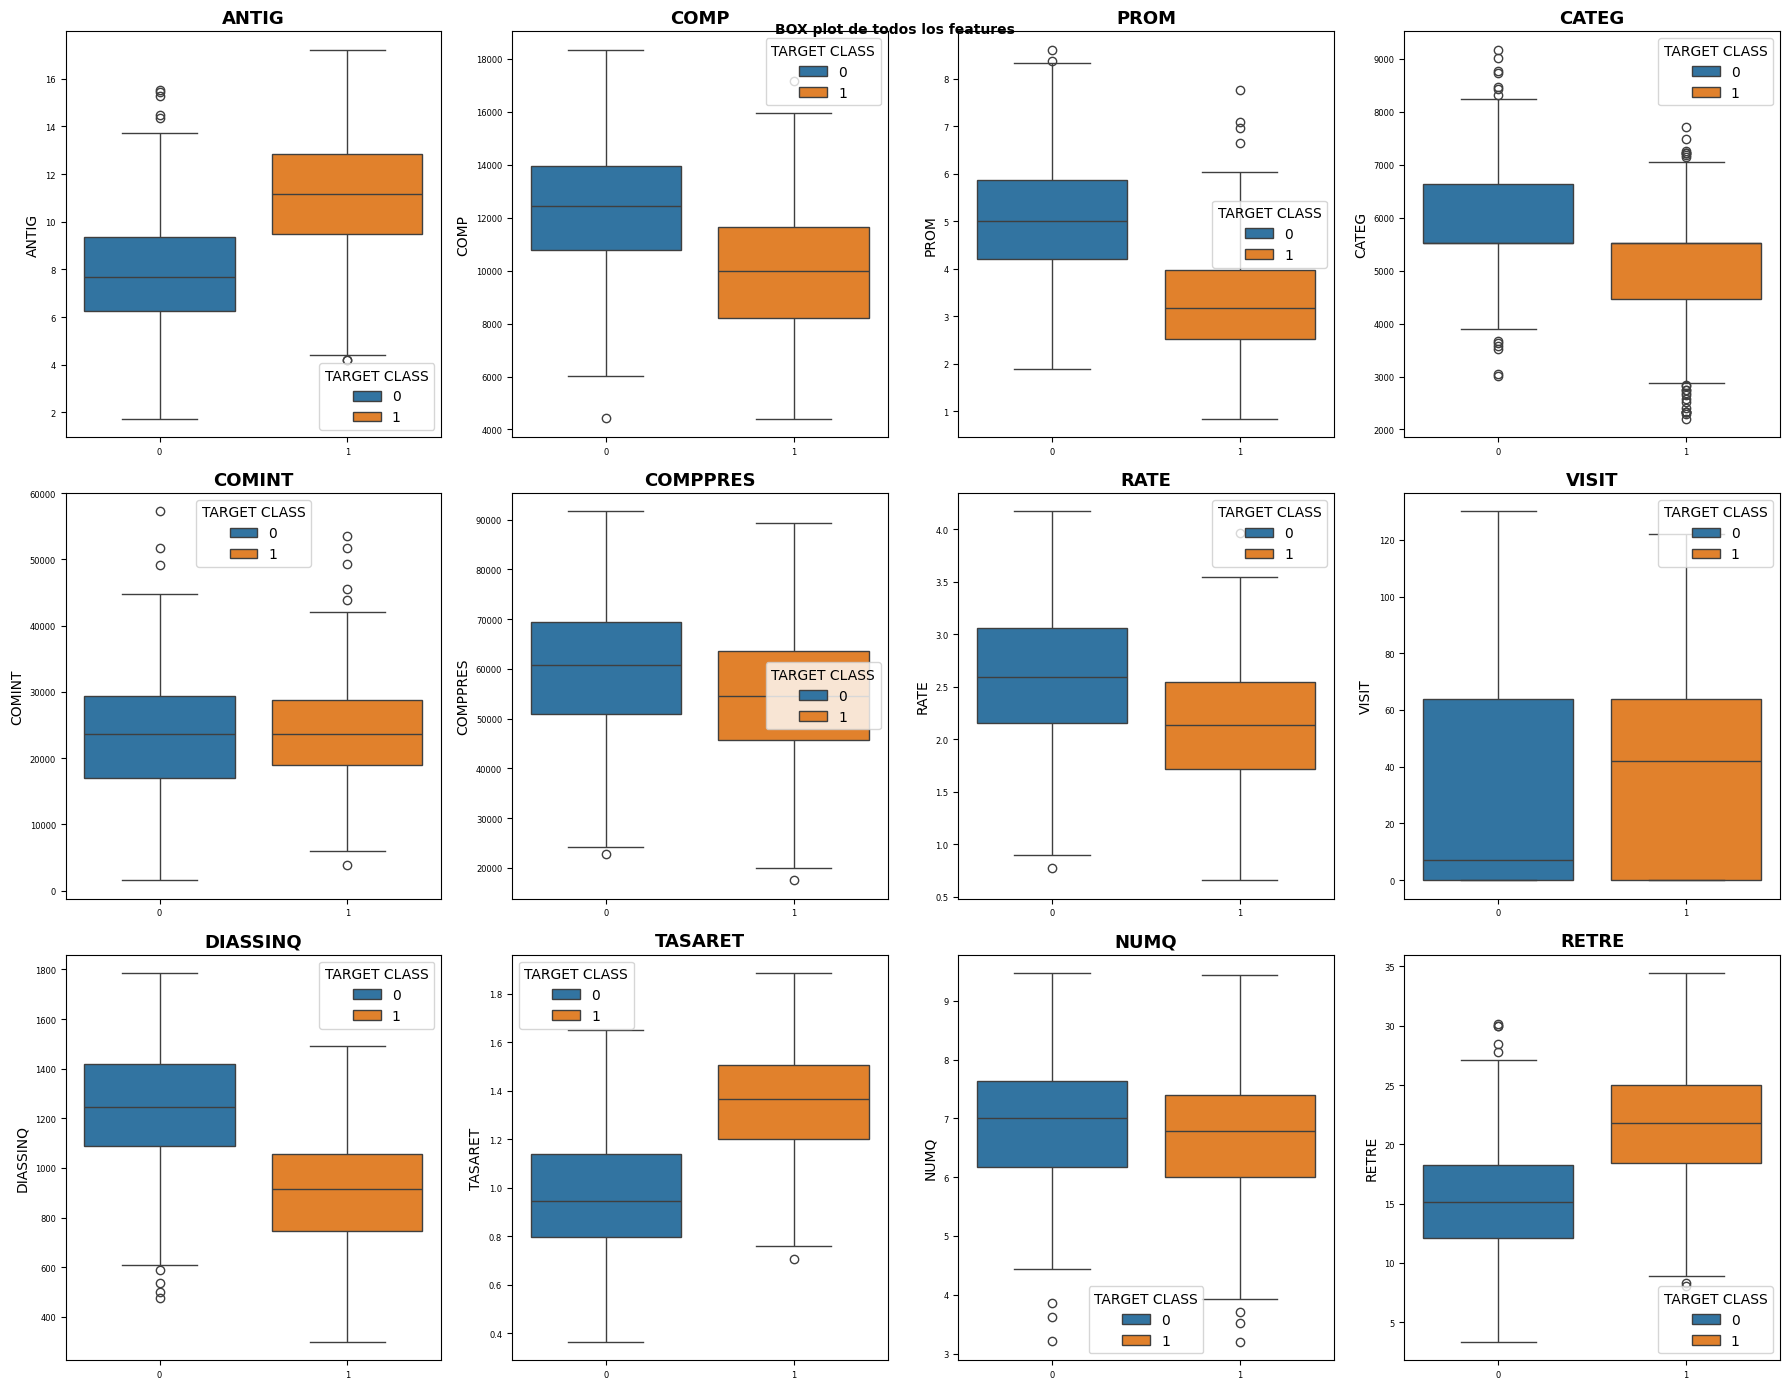

In [84]:
# Definir parámetros de la gráfica
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 14))  # Ajusta el tamaño del subplot según sea necesario
axes = axes.flat

# Recorrer todas las columnas excepto la última (asumiendo que 'TARGET CLASS' es la última columna)
for i, columna in enumerate(dfc.columns[:-1]):
    sns.boxplot(x='TARGET CLASS', y=columna, data=dfc, hue='TARGET CLASS', ax=axes[i])
    axes[i].set_title(columna, fontsize=13, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

# Ajustar automáticamente los tamaños para evitar que las gráficas se superpongan
fig.tight_layout()

# Título principal de la figura
fig.suptitle("BOX plot de todos los features", fontsize=10, fontweight="bold")

plt.show()


In [85]:
dfc.isna().sum()
# Cuenta la cantidad de valores nulos en cada columna del DataFrame 'dfc'.

ANTIG           0
COMP            0
PROM            0
CATEG           0
COMINT          0
COMPPRES        0
RATE            0
VISIT           0
DIASSINQ        0
TASARET         0
NUMQ            0
RETRE           0
TARGET CLASS    0
dtype: int64

In [86]:
# Genera gráficos de densidad para cada columna en el DataFrame 'dfc', con un diseño de subtramas de 4x4.
# Se establece un tamaño de figura grande de 200x200. #No se logra apreciar por lo que se recurre a otra alternativa

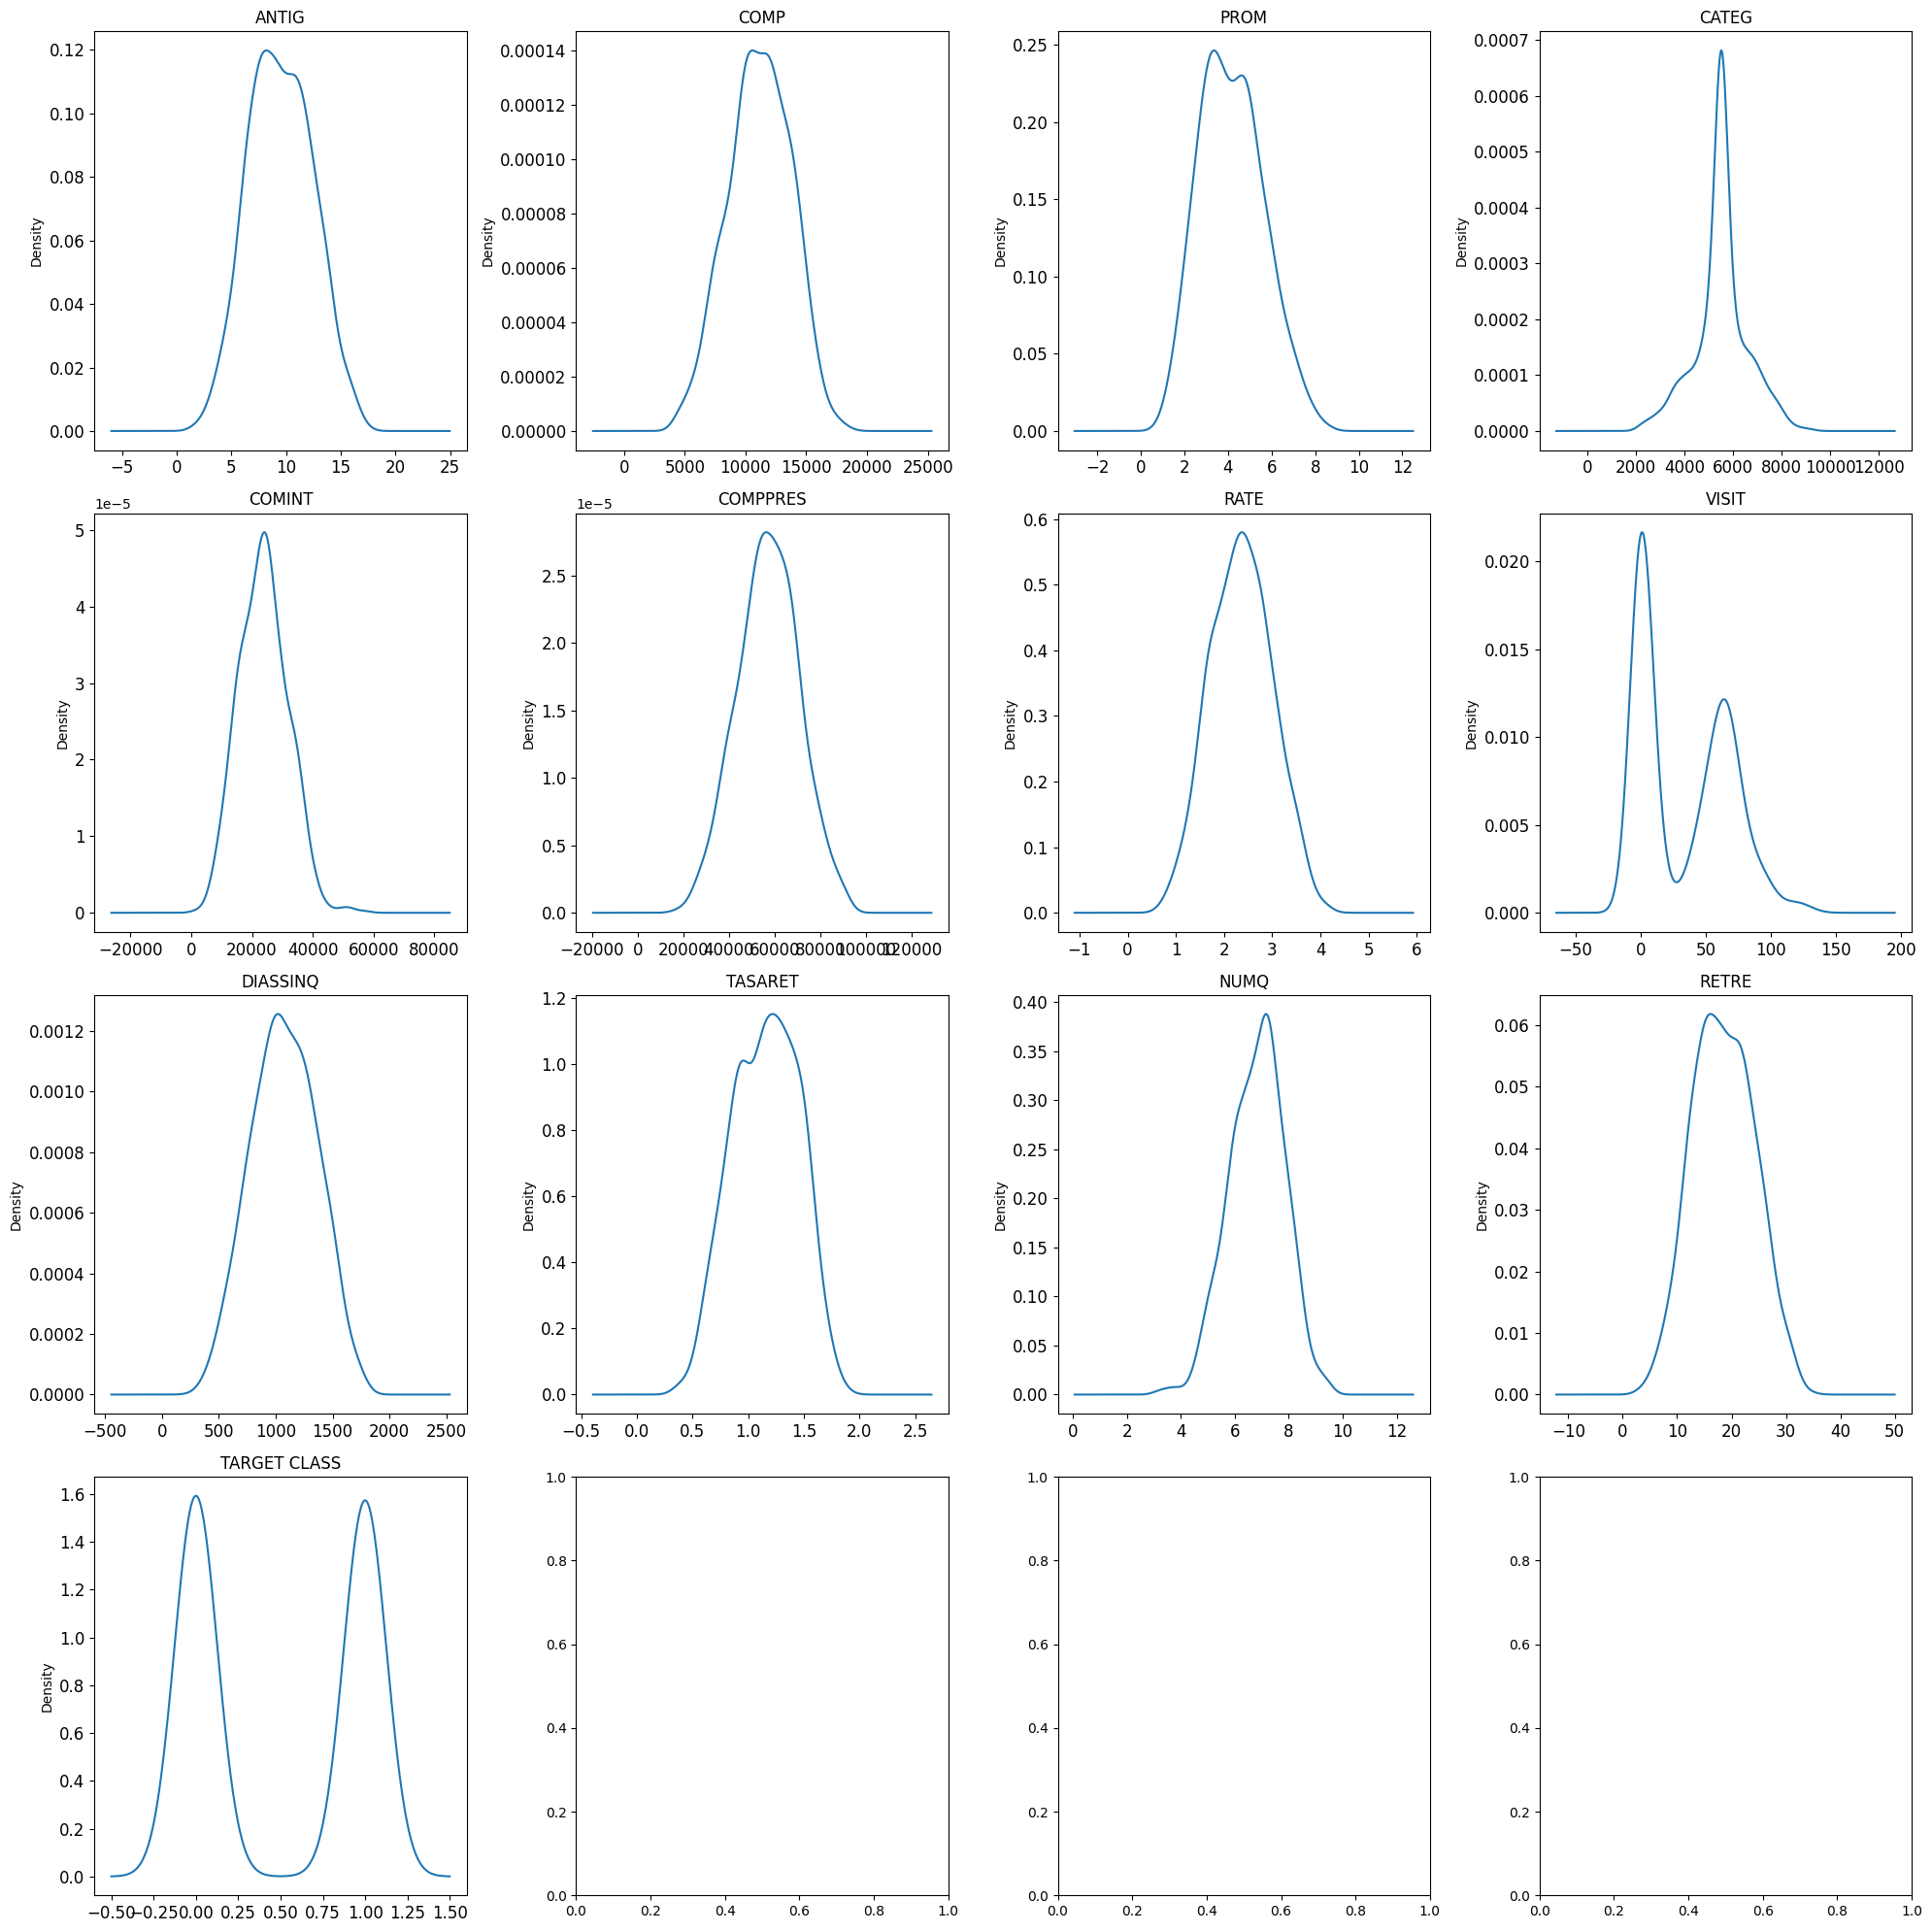

In [87]:
# Definir parámetros de la gráfica
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Reducir el tamaño de la figura

# Recorrer todas las columnas
for i, columna in enumerate(dfc.columns):
    dfc[columna].plot(kind='density', ax=axes[i//4, i%4], title=columna, fontsize=12)  # Ajustar el tamaño de la fuente

# Ajustar automáticamente los tamaños para evitar que las gráficas se superpongan
fig.tight_layout()

plt.show()

In [88]:
#CROSS VALIDATION:#El modelo no se puede generalizar por que segun los datos varian, para ello utilizamos el Cross Validation
Kpliegues=KFold(n_splits=5)# Definir el número de pliegues para la validación cruzada
scores=cross_val_score(modeloNB,X_train, y_train, cv=Kpliegues)# Aplicar validación cruzada y obtener los scores
print("Score Naive Bayes con Cross Validation", scores)
print("Promedio de los scores", scores.mean())
print("Varianza de los scores", scores.var())
print("Numero de pliegues usados", len(scores))

Score Naive Bayes con Cross Validation [0.91772152 0.88607595 0.91139241 0.94936709 0.91139241]
Promedio de los scores 0.9151898734177216
Varianza de los scores 0.0004101906745713828
Numero de pliegues usados 5


In [89]:
cross_val_predict(modeloNB,X_train, y_train, cv=Kpliegues)# Obtener las predicciones del modelo Naive Bayes utilizando validación cruzada

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,

In [90]:
y_train# Imprimir las etiquetas reales de los datos de entrenamiento

725    1
63     0
139    0
779    1
479    1
      ..
790    1
477    1
756    0
823    0
657    1
Name: TARGET CLASS, Length: 790, dtype: int64

In [91]:
y_train.value_counts() #DATOS BALANCEADOS

0    396
1    394
Name: TARGET CLASS, dtype: int64

<Axes: ylabel='Frequency'>

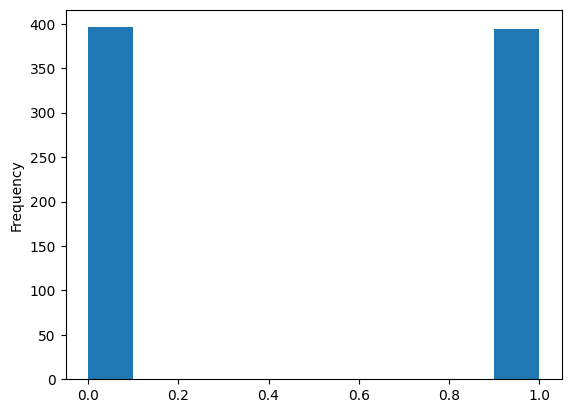

In [92]:
y_train.plot.hist()# Trazar un gráfico de barras para visualizar la distribución de las etiquetas de entrenamiento

In [93]:
X_text.value_counts()# Contar la frecuencia de valores únicos en una columna específica del DataFrame X_text

ANTIG      COMP   PROM  CATEG        COMINT  COMPPRES  RATE      VISIT  DIASSINQ  TASARET   NUMQ      RETRE    
1.817337   10668  5.96  5521.862605  34325   71545     2.437933  66.0   988       0.725647  6.588098  3.598328     1
10.713895  7810   1.74  3905.250000  37007   41497     1.131576  0.0    764       1.253251  4.164740  20.356401    1
10.815597  10870  3.52  5435.120000  15202   67079     1.631538  48.0   649       1.165415  6.615938  21.631194    1
10.845352  7932   3.24  3966.110000  37068   51597     1.090183  72.0   888       1.689943  5.019051  21.256890    1
10.874700  11265  4.66  5632.650000  15067   79892     3.302819  63.0   1051      0.878861  7.687676  20.661930    1
                                                                                                                  ..
8.516334   9774   2.67  5521.862605  12874   39861     1.913250  53.0   1157      1.140612  6.320259  16.351361    1
8.526928   13277  3.30  6638.580000  10457   58973     2.520268  0.0 

In [94]:
print(classification_report(y_test,y_prect))# Imprimir el informe de clasificación

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       101
           1       0.89      0.93      0.91        97

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



In [95]:
#Area bajo la curva
print("Area bajo la curva", auc(fpr,tpr))

Area bajo la curva 0.9094620802286415


ÁRBOLES DE DECISIÓN

In [96]:
dfc.isnull().sum() #Halla los campos donde no hay datos

ANTIG           0
COMP            0
PROM            0
CATEG           0
COMINT          0
COMPPRES        0
RATE            0
VISIT           0
DIASSINQ        0
TASARET         0
NUMQ            0
RETRE           0
TARGET CLASS    0
dtype: int64

In [97]:
dfc['TARGET CLASS'].value_counts() #numero de datos (Sirve para ver si los datos estan balanceados)

0    497
1    491
Name: TARGET CLASS, dtype: int64

In [98]:
modeloArbol= tree.DecisionTreeClassifier(criterion='entropy',
                                         min_samples_split=10,
                                         min_samples_leaf=5,
                                         max_depth=6,
                                         random_state=444)
# Crear un clasificador de árbol de decisión con los siguientes parámetros:
# - criterion='entropy': Utilizar la entropía como medida de calidad de la división.
# - min_samples_split=10: El número mínimo de muestras necesarias para dividir un nodo interno.
# - min_samples_leaf=5: El número mínimo de muestras requeridas en un nodo hoja.
# - max_depth=6: La profundidad máxima del árbol.
# - random_state=444: Semilla aleatoria para garantizar la reproducibilidad.

 #DECLARAR INSTANCIA O CREACION DE MODELO

In [99]:
modeloArbol.fit(X_train, y_train)# Entrenar el clasificador de árbol de decisión utilizando los datos de entrenamiento X_train y las etiquetas y_train.

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=10, random_state=444)

In [100]:
modeloArbol.classes_## Obtener la lista de clases que el modelo de árbol de decisión puede predecir

array([0, 1])

In [101]:
modeloArbol.max_features_# Obtener el valor de max_features utilizado en el modelo

12

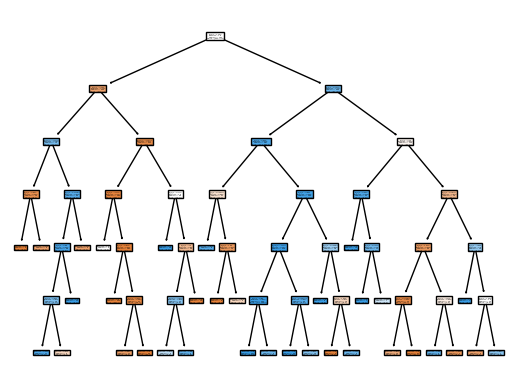

In [102]:
tree.plot_tree(modeloArbol, filled=True)# Plotear el árbol de decisión entrenado
plt.savefig("Mi arbolito.jpg")# Guardar la figura como "Mi arbolito.jpg"
plt.show()# Mostrar la figura

In [103]:
dfc.columns# Obtener los nombres de las columnas del DataFrame dfc

Index(['ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES', 'RATE', 'VISIT',
       'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE', 'TARGET CLASS'],
      dtype='object')

In [104]:
print(tree.export_text(modeloArbol ,feature_names=['ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES', 'RATE', 'VISIT',
       'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE']))# Imprimir una representación de texto del árbol de decisiones entrenado

|--- TASARET <= 1.16
|   |--- PROM <= 3.20
|   |   |--- RETRE <= 14.64
|   |   |   |--- TASARET <= 0.90
|   |   |   |   |--- class: 0
|   |   |   |--- TASARET >  0.90
|   |   |   |   |--- class: 0
|   |   |--- RETRE >  14.64
|   |   |   |--- COMP <= 13210.00
|   |   |   |   |--- TASARET <= 0.98
|   |   |   |   |   |--- RATE <= 2.60
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- RATE >  2.60
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- TASARET >  0.98
|   |   |   |   |   |--- class: 1
|   |   |   |--- COMP >  13210.00
|   |   |   |   |--- class: 0
|   |--- PROM >  3.20
|   |   |--- RETRE <= 22.81
|   |   |   |--- DIASSINQ <= 741.00
|   |   |   |   |--- class: 0
|   |   |   |--- DIASSINQ >  741.00
|   |   |   |   |--- ANTIG <= 9.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ANTIG >  9.68
|   |   |   |   |   |--- RATE <= 2.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- RATE >  2.25
|   |   |   |   |   |   |--- class: 0
|   |   |

In [105]:
import joblib as jb
jb.dump(modeloArbol,"ModeloArbol,bin",compress=True) # Guardar el modelo de árbol de decisión entrenado en un archivo utilizando la biblioteca joblib

['ModeloArbol,bin']

In [106]:
corr_matrix=dfc.corr()
corr_matrix # Calcular la matriz de correlación para el DataFrame dfc

ANTIG      COMP      PROM     CATEG    COMINT  COMPPRES  \
ANTIG         1.000000 -0.235067 -0.301251 -0.244593 -0.100659 -0.079184   
COMP         -0.235067  1.000000  0.268924  0.834491  0.002729  0.100650   
PROM         -0.301251  0.268924  1.000000  0.260448 -0.039534  0.149284   
CATEG        -0.244593  0.834491  0.260448  1.000000 -0.019894  0.083476   
COMINT       -0.100659  0.002729 -0.039534 -0.019894  1.000000 -0.009886   
COMPPRES     -0.079184  0.100650  0.149284  0.083476 -0.009886  1.000000   
RATE         -0.183541  0.173216  0.178730  0.136570  0.022079  0.048504   
VISIT         0.070935 -0.021106  0.034323 -0.024093  0.052657  0.001218   
DIASSINQ     -0.336884  0.247533  0.327741  0.232914  0.042252  0.089390   
TASARET       0.327132 -0.265824 -0.322521 -0.218456  0.078766 -0.150515   
NUMQ         -0.072883  0.037590  0.127304 -0.004298  0.145627  0.048689   
RETRE         0.998200 -0.233334 -0.302979 -0.243237 -0.102127 -0.078908   
TARGET CLASS  0.554488 -0.470027 -0.596639 -0.411856  0.027136 -0.211026   

                  RATE     VISIT  DIASSINQ   TASARET      NUMQ     RETRE  \
ANTIG        -0.183541  0.070935 -0.336884  0.327132 -0.072883  0.998200   
COMP          0.173216 -0.021106  0.247533 -0.265824  0.037590 -0.233334   
PROM          0.178730  0.034323  0.327741 -0.322521  0.127304 -0.302979   
CATEG         0.136570 -0.024093  0.232914 -0.218456 -0.004298 -0.243237   
COMINT        0.022079  0.052657  0.042252  0.078766  0.145627 -0.102127   
COMPPRES      0.048504  0.001218  0.089390 -0.150515  0.048689 -0.078908   
RATE          1.000000  0.009919  0.199678 -0.179983  0.035295 -0.183698   
VISIT         0.009919  1.000000 -0.046623  0.055359  0.004560  0.075022   
DIASSINQ      0.199678 -0.046623  1.000000 -0.369681  0.029441 -0.337499   
TASARET      -0.179983  0.055359 -0.369681  1.000000 -0.128580  0.330505   
NUMQ          0.035295  0.004560  0.029441 -0.128580  1.000000 -0.072857   
RETRE        -0.183698  0.075022 -0.337499  0.330505 -0.072857  1.000000   
TARGET CLASS -0.324905  0.040001 -0.572113  0.644744 -0.112015  0.555995   

              TARGET CLASS  
ANTIG             0.554488  
COMP             -0.470027  
PROM             -0.596639  
CATEG            -0.411856  
COMINT            0.027136  
COMPPRES         -0.211026  
RATE             -0.324905  
VISIT             0.040001  
DIASSINQ         -0.572113  
TASARET           0.644744  
NUMQ             -0.112015  
RETRE             0.555995  
TARGET CLASS      1.000000

In [107]:
y_predictA=modeloArbol.predict(X_text)# Utilizar el modelo de árbol de decisión para hacer predicciones sobre el conjunto de datos de características X_text

In [108]:
y_predictdt=modeloArbol.predict(X_text)# Utilizar el modelo de árbol de decisión para hacer predicciones sobre el conjunto de datos de características X_text
y_predictnb=modeloNB.predict(X_text)# Utilizar el modelo Naive Bayes para hacer predicciones sobre el conjunto de datos de características X_text

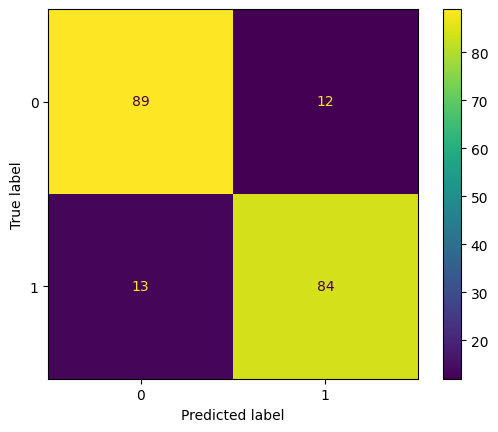

In [109]:
matrix=confusion_matrix(y_test,y_predictA)# Calcular la matriz de confusión
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloArbol.classes_)# Crear un objeto ConfusionMatrixDisplay para mostrar la matriz de confusión
mostrarMatrix.plot()

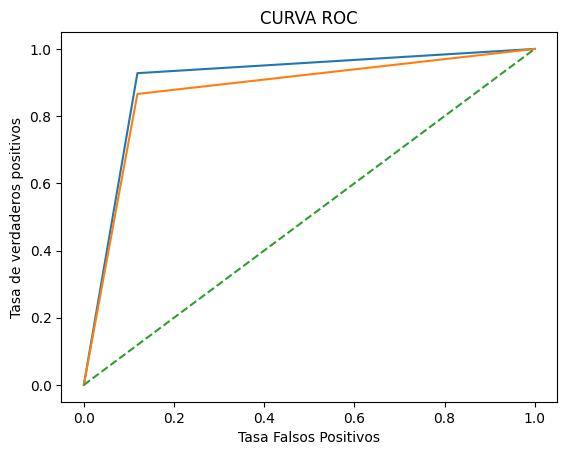

In [110]:
fpr, tprnb, umbral=roc_curve(y_test,y_predictnb)# Calcular las tasas de falsos positivos (fpr) y verdaderos positivos (tpr) para Naive Bayes
fpr, tprdt, umbral=roc_curve(y_test,y_predictdt)# Calcular las tasas de falsos positivos (fpr) y verdaderos positivos (tpr) para Árbol de Decisión
plt.plot(fpr,tprnb)# Plotear la curva ROC para Naive Bayes
plt.plot(fpr,tprdt)# Plotear la curva ROC para Árbol de Decisión
plt.plot([0,1],[0,1],"--")# Plotear la línea diagonal
plt.xlabel("Tasa Falsos Positivos")# Etiquetas y título del gráfico
plt.ylabel("Tasa de verdaderos positivos") # Mostrar leyenda
plt.title("CURVA ROC")
plt.show()

In [111]:
print("Área bajo la curva", auc(fpr,tprdt))# Imprimir el área bajo la curva (AUC) para la curva ROC del modelo de Árbol de Decisión

Área bajo la curva 0.8735837501275902


In [112]:
print("Área bajo la curva", auc(fpr,tprnb))# Imprimir el área bajo la curva (AUC) para la curva ROC del modelo Naive Bayes

Área bajo la curva 0.9045115851791364


BOSQUE ALEATORIO

In [113]:
modeloBosque = RandomForestClassifier(n_estimators=20,
                                      criterion="gini",
                                      bootstrap=True,
                                      max_features="sqrt",
                                      max_samples=3/4,
                                      oob_score=True,
                                      random_state=99999)
# Crear un clasificador de Bosque Aleatorio con los siguientes parámetros:
# - n_estimators=20: El número de árboles en el bosque.
# - criterion="gini": La función para medir la calidad de una división.
# - bootstrap=True: Si se deben usar muestras bootstrap al construir árboles.
# - max_features="sqrt": El número de características a considerar en cada división.
# - max_samples=3/4: El número de muestras a extraer para entrenar cada árbol.
# - oob_score=True: Si se deben utilizar muestras de fuera de la bolsa para estimar la precisión.
# - random_state=99999: Semilla aleatoria para garantizar la reproducibilidad.

In [114]:
modeloBosque.fit(X_train,y_train) # Entrenar el clasificador de Bosque Aleatorio utilizando los datos de entrenamiento X_train y las etiquetas y_train.

RandomForestClassifier(max_samples=0.75, n_estimators=20, oob_score=True,
                       random_state=99999)

In [115]:
modeloBosque.score(X_text,y_test)# Calcular la precisión del modelo de Bosque Aleatorio en el conjunto de datos de prueba

0.9292929292929293

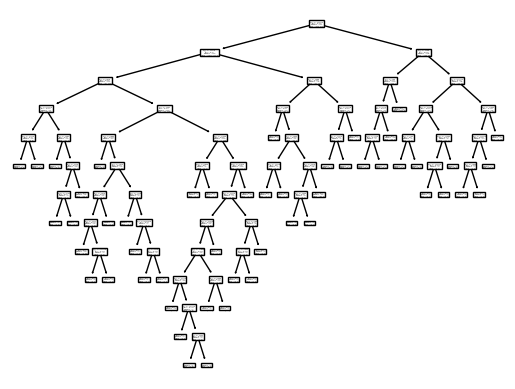

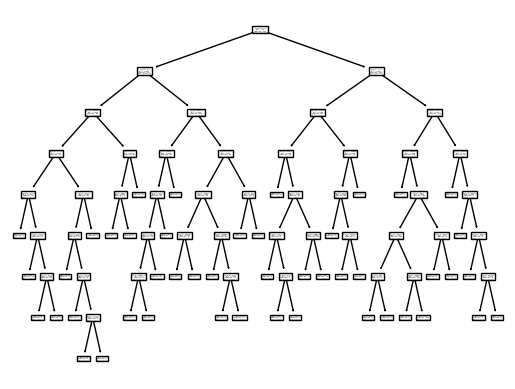

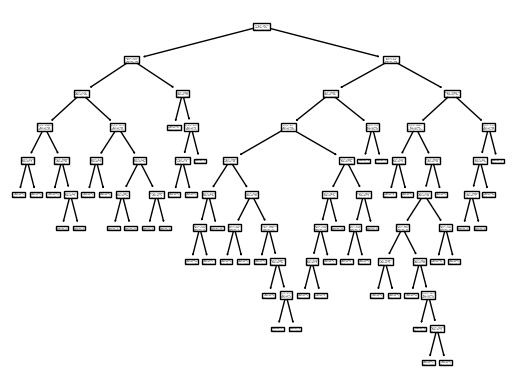

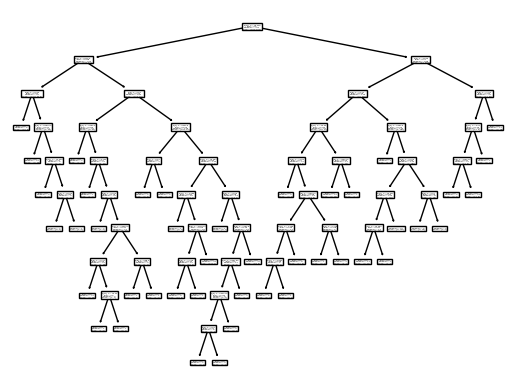

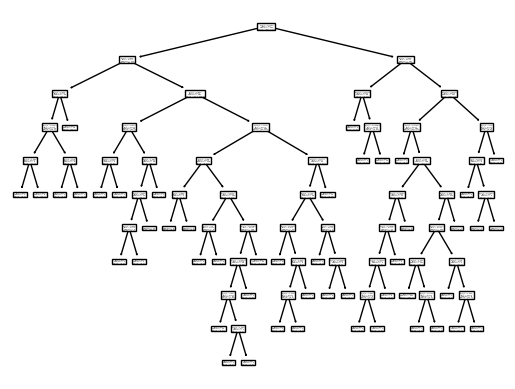

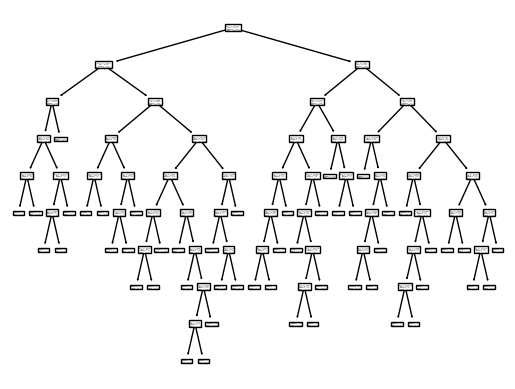

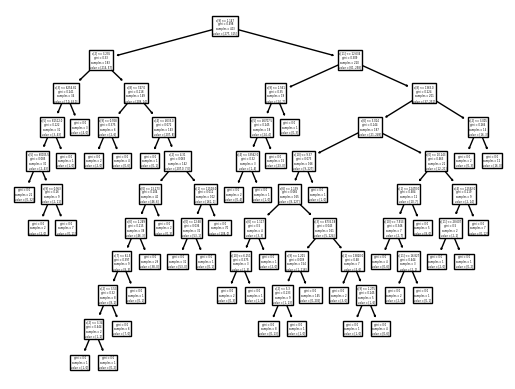

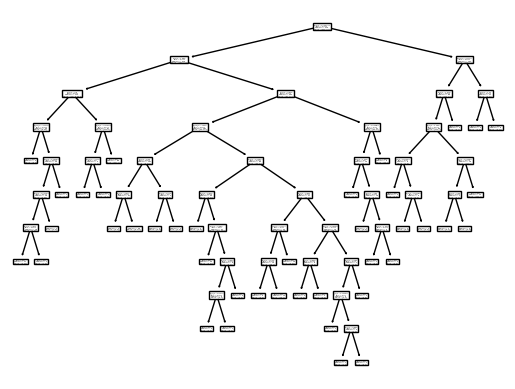

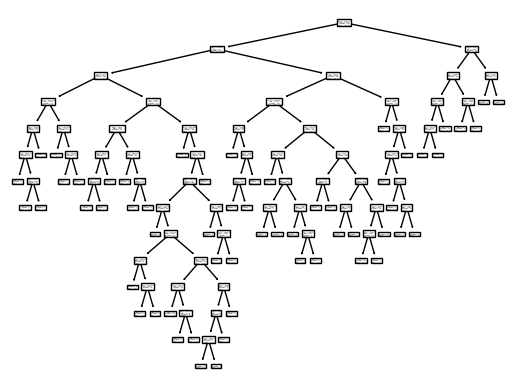

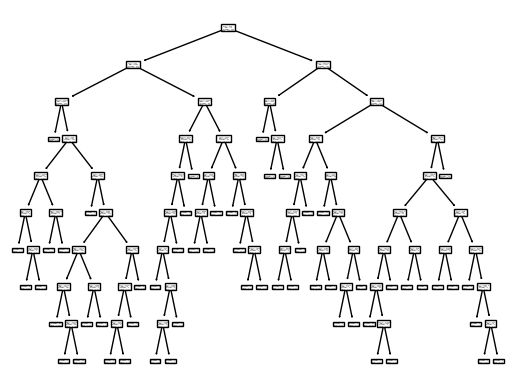

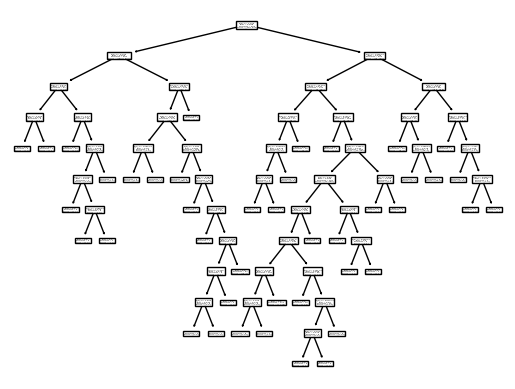

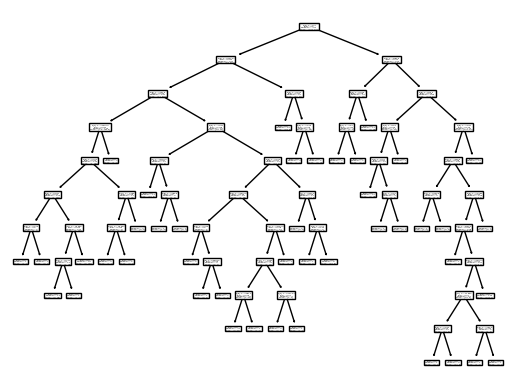

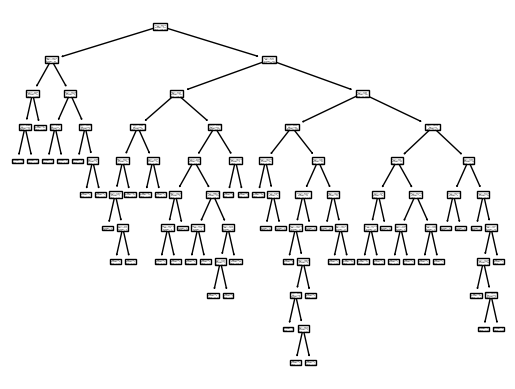

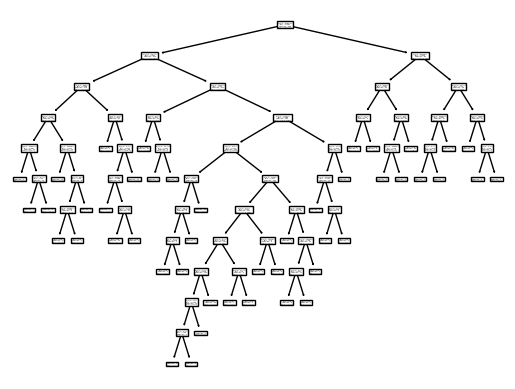

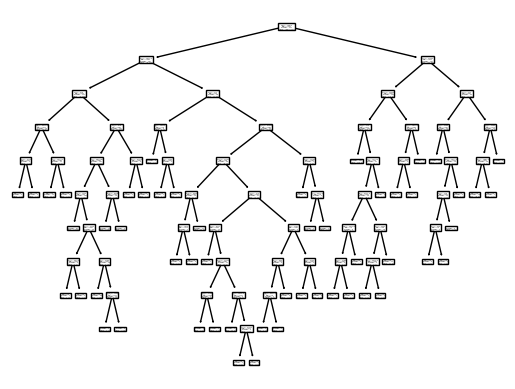

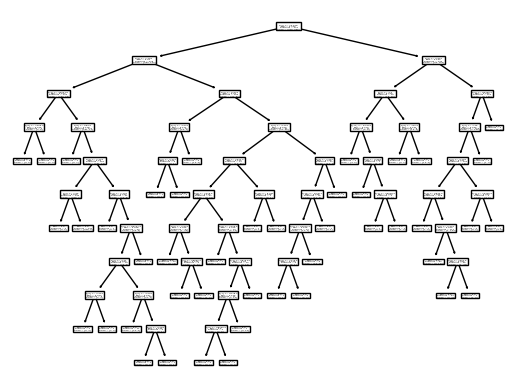

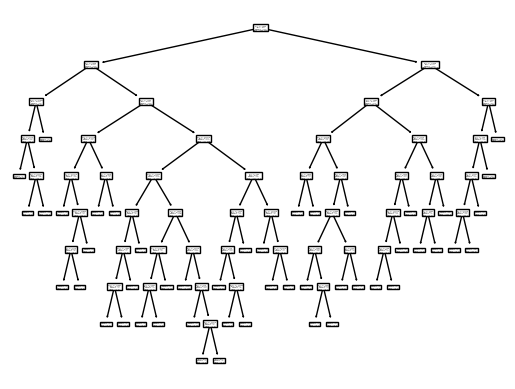

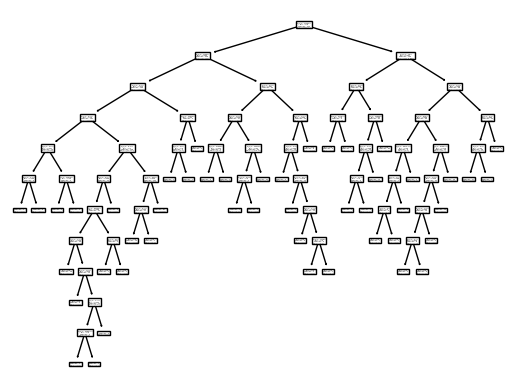

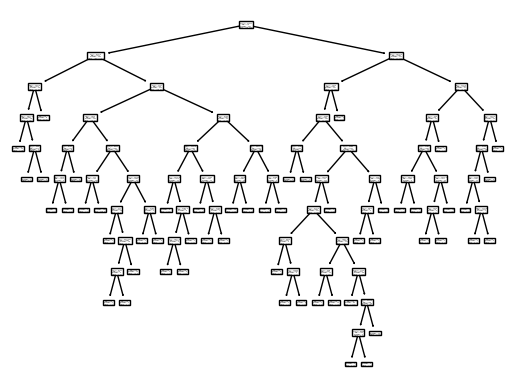

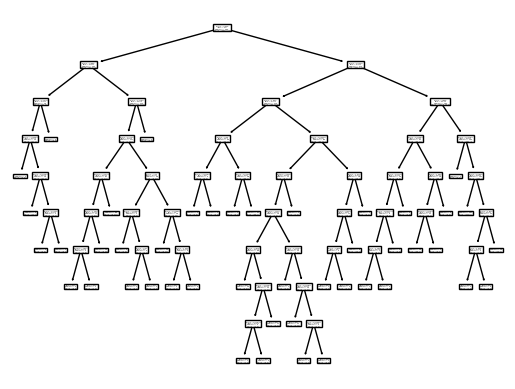

In [116]:
for i in modeloBosque.estimators_:# Iterar sobre cada estimador en el bosque aleatorio
    tree.plot_tree(i)# Plotear el árbol de decisión
    plt.show()

In [117]:
jb.dump(modeloBosque,"modelobosque.bin")# Guardar el modelo de Bosque Aleatorio en un archivo binario


['modelobosque.bin']

In [118]:
y_predict=modeloBosque.predict(X_text)# Utilizar el modelo de Bosque Aleatorio para hacer predicciones sobre el conjunto de datos de características X_text
y_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [119]:
print(modeloBosque.score(X_text,y_test),modeloArbol.score(X_text,y_test))
# Imprime el puntaje de precisión (score) del modelo de Bosque Aleatorio y del modelo de Árbol de Decisión en los datos de prueba (X_text, y_test)

0.9292929292929293 0.8737373737373737


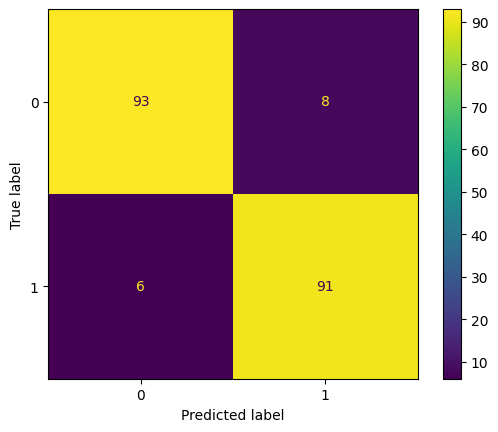

In [120]:
matrix=confusion_matrix(y_test,y_predict)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloBosque.classes_)
mostrarMatrix.plot()
# Calcula la matriz de confusión entre las etiquetas reales (y_test) y las predicciones (y_predict) del modelo,
# luego muestra la matriz de confusión utilizando ConfusionMatrixDisplay para el modelo de Bosque Aleatorio.

In [121]:
print('Acurracy de entrenamiento', modeloBosque.score(X_train,y_train))# Imprime la precisión (accuracy) del modelo de Bosque Aleatorio en el conjunto de entrenamiento (X_train, y_train).
print('Acurracy de datos de prueba', modeloBosque.score(X_text,y_test))# Imprime la precisión (accuracy) del modelo de Bosque Aleatorio en los datos de prueba (X_text, y_test).
print('Acurracy de validaci+ón (OOBs)', modeloBosque.oob_score_) # Imprime la precisión (accuracy) fuera de la bolsa (OOB) del modelo de Bosque Aleatorio.

Acurracy de entrenamiento 0.9949367088607595
Acurracy de datos de prueba 0.9292929292929293
Acurracy de validaci+ón (OOBs) 0.9139240506329114


In [122]:
train_score=[]# Lista para almacenar los puntajes de entrenamiento
oob_score=[]# Lista para almacenar los puntajes fuera de la bolsa (OOB)

estimadores=range(10,100,1) # Rango de estimadores para probar
# Bucle para ajustar modelos de Bosque Aleatorio con diferentes números de estimadores
for estimador in estimadores:
  # Crear modelo de Bosque Aleatorio con el número de estimadores actual
  modeloBosque = RandomForestClassifier(n_estimators=estimador,
                                          criterion="gini",
                                          bootstrap=True,
                                          max_features="sqrt",
                                          max_samples=3/4,
                                          oob_score=True,
                                          random_state=99999)
  modeloBosque.fit(X_train,y_train) # Ajustar el modelo con los datos de entrenamiento
  train_score.append(modeloBosque.score(X_text,y_test))# Calcular y almacenar el puntaje de precisión en los datos de prueba
  oob_score.append(modeloBosque.oob_score_)# Calcular y almacenar el puntaje OOB


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


El valor recomendado (numero arboles): 82


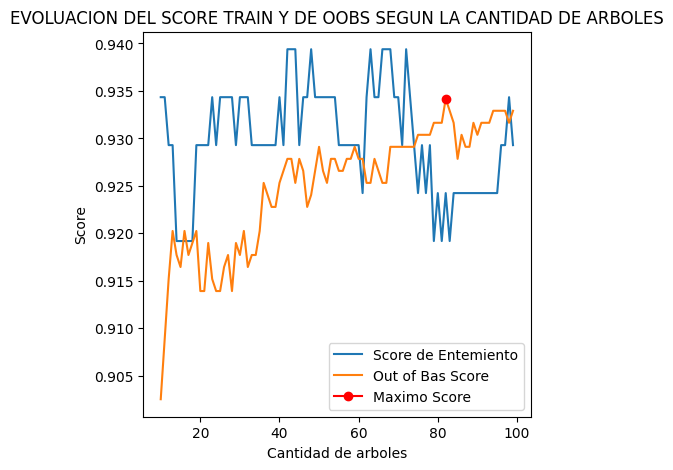

In [123]:
fig,ax=plt.subplots(figsize=(5,5))# Crear una figura y ejes para visualización
ax.plot(estimadores,train_score,label="Score de Entemiento") # Graficar la evolución del puntaje de entrenamiento en función del número de estimadores
ax.plot(estimadores,oob_score,label="Out of Bas Score")# Graficar la evolución del puntaje OOB en función del número de estimadores
ax.plot(estimadores[np.argmax(oob_score)], max(oob_score), marker="o",color="red",label="Maximo Score")# Resaltar el máximo puntaje OOB con un marcador rojo
ax.set_ylabel('Score')
ax.set_xlabel("Cantidad de arboles")
ax.set_title("EVOLUACION DEL SCORE TRAIN Y DE OOBS SEGUN LA CANTIDAD DE ARBOLES")# Etiquetas y título del gráfico
plt.legend()# Mostrar la leyenda
print(f"El valor recomendado (numero arboles): {estimadores[np.argmax(oob_score)]}")# Imprimir el número recomendado de árboles basado en el máximo puntaje OOB

In [124]:
#Comparacion de Accuracys
print('Acurracy Modelo NB: ', modeloNB.score(X_text,y_test))
print('Acurracy Modelo Arboles: ', modeloArbol.score(X_text,y_test))
print('Acurracy Modelo Bosques: ', modeloBosque.score(X_text,y_test))

Acurracy Modelo NB:  0.9090909090909091
Acurracy Modelo Arboles:  0.8737373737373737
Acurracy Modelo Bosques:  0.9292929292929293


In [125]:
nombre_archivo = 'modelobosque.bin'
        #Guardar el modelo en un archivo binario utilizando pickle
with open(nombre_archivo, 'wb') as f:
      pickle.dump(modeloBosque, f)

In [126]:
importancia=modeloBosque.feature_importances_

In [127]:
modeloBosque.feature_names_in_

array(['ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES', 'RATE',
       'VISIT', 'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE'], dtype=object)

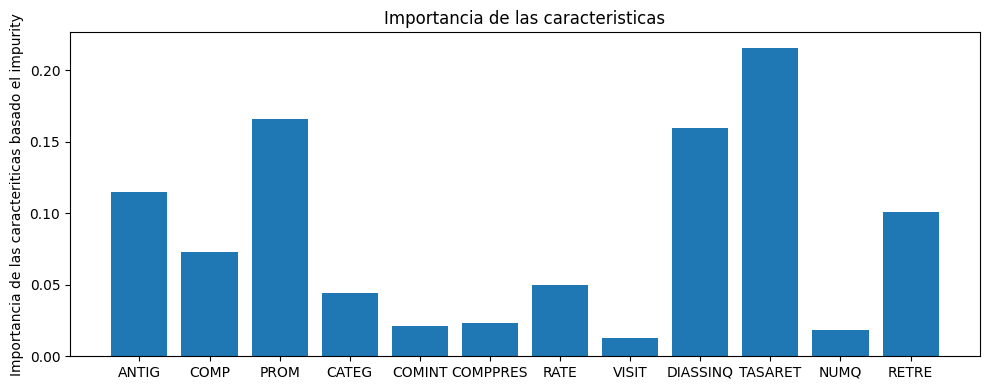

In [129]:
features=['ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES', 'RATE',
       'VISIT', 'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE']
importancia_pronostico=pd.Series(importancia,index=features)
fig,ax=plt.subplots(figsize=(10,4))
ax.bar(features,importancia)
ax.set_title("Importancia de las caracteristicas")
ax.set_ylabel("Importancia de las caracteriticas basado el impurity")
fig.tight_layout()